# Modeling with CNNs

Because we could not adequately model our data using simple techniques, we must move on to a more complex modeling approach utilizing artificial neural nets. 

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# set optional module display options
%matplotlib inline
pd.set_option('display.max_colwidth', None)

### Load and Preview Data

In [2]:
# import regression metadata dataset
df = pd.read_csv('../datasets/og_df.csv')

# preview dataset
df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [3]:
# import classification metadata datasets
df2 = pd.read_csv('../datasets/2class_df.csv')
df3 = pd.read_csv('../datasets/3class_df.csv')
df4 = pd.read_csv('../datasets/4class_df.csv')
df5 = pd.read_csv('../datasets/5class_df.csv')

# preview dataset
df2.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,46.0
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,46.0
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,25.0
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,25.0
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,46.0


In [4]:
# import necessary modules
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [84]:
# load images into workspace drom directory
train_generator = ImageDataGenerator().flow_from_directory(directory='../data/',
                                                           shuffle=False,        # load images in alphanumerical order
                                                           target_size=(224,224), 
                                                           classes=['train'],
                                                           batch_size=9912)

# save images as RGB arrays
X_img = train_generator[0][0]

Found 9912 images belonging to 1 classes.


In [69]:
# check dataset shape
X_img.shape

(100, 224, 224, 3)

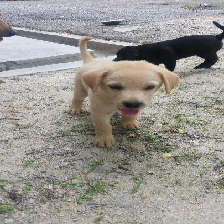

In [40]:
# preview first image
array_to_img(X_img[0])

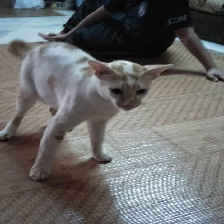

In [42]:
array_to_img(X_img[99])

In [211]:
# from IPython.core.display import HTML

In [208]:
# def path_to_image_html(path):
#     return '<img src="'+ path + '" width="60" >'

In [205]:
# def convert_to_path(name):
#     path = '../data/train/' + str(name) + '.jpg'
#     return path

In [206]:
# df['image'] = df['Id'].map(lambda x: convert_to_path(x))

In [ ]:
# HTML(df.to_html(escape=False, formatters=dict(image=path_to_image_html)))

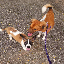

In [198]:
# preview last image
array_to_img(X_img[])

In [34]:
from sklearn.model_selection import train_test_split

In [156]:
X_train_img, X_test_img = train_test_split(X_img, random_state=42)
X_train_meta, X_test_meta = train_test_split(df.drop(['Id', 'Pawpularity'], axis=1), random_state=42)

X_train_img /= 255
X_test_img /= 255

y_train_reg, y_test_reg = train_test_split(df['Pawpularity'], random_state=42)
y_train_clf2, y_test_clf2 = train_test_split(df2['Pawpularity'], random_state=42)
y_train_clf3, y_test_clf3 = train_test_split(df3['Pawpularity'], random_state=42)
y_train_clf4, y_test_clf4 = train_test_split(df4['Pawpularity'], random_state=42)
y_train_clf5, y_test_clf5 = train_test_split(df5['Pawpularity'], random_state=42)

## Modeling

We'll start with an autokeras Image Regression Model. It should perform quite well out of box. We'll use this as our baseline, and then create our own custom CNNs later, also trying some classification networks as well. 

In [20]:
import autokeras as ak

In [221]:
reg = ak.ImageRegressor(
    overwrite=True, 
    max_trials=1, 
    tuner='random')

In [ ]:
reg.fit(X_train_img, y_train_reg, epochs=25, validation_split=0.2)


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
image_block_1/n...|True              |?                 
image_block_1/a...|True              |?                 
image_block_1/b...|xception          |?                 
regression_head...|0.25              |?                 
optimizer         |sgd               |?                 
learning_rate     |0.0001            |?                 

Epoch 1/25
187/187 [==============================] - 186s 994ms/step - loss: 448.1903 - mean_squared_error: 448.1903 - val_loss: 1837.1216 - val_mean_squared_error: 1837.1216
Epoch 2/25
 21/187 [==>...........................] - ETA: 2:31 - loss: 455.3345 - mean_squared_error: 455.3345

In [214]:
reg

In [37]:
preds = reg.predict(X_test_img)

78/78 [==============================] - 21s 275ms/step


In [38]:
from sklearn.metrics import mean_squared_error

In [62]:
mean_squared_error(y_test_img, preds, squared=False)

21.20364434478352

RMSE of 21.20... not a bad start! Let's try something a bit more custom. 

In [63]:
import tensorflow as tf
from tensorflow import keras

In [98]:
X_train_img

array([[[[0.8980392 , 0.8666667 , 0.8156863 ],
         [0.89411765, 0.85490197, 0.80784315],
         [0.8862745 , 0.84705883, 0.8       ],
         ...,
         [0.84313726, 0.827451  , 0.78039217],
         [0.8117647 , 0.7764706 , 0.70980394],
         [0.77254903, 0.7254902 , 0.67058825]],

        [[0.8901961 , 0.84313726, 0.75686276],
         [0.9098039 , 0.85882354, 0.79607844],
         [0.92156863, 0.87058824, 0.80784315],
         ...,
         [0.85490197, 0.8392157 , 0.7921569 ],
         [0.84313726, 0.827451  , 0.78039217],
         [0.8862745 , 0.8627451 , 0.80784315]],

        [[0.79607844, 0.7490196 , 0.69411767],
         [0.84705883, 0.79607844, 0.7294118 ],
         [0.8980392 , 0.84705883, 0.78039217],
         ...,
         [0.92941177, 0.9137255 , 0.8666667 ],
         [0.89411765, 0.8784314 , 0.83137256],
         [0.94509804, 0.92941177, 0.88235295]],

        ...,

        [[0.4117647 , 0.47058824, 0.39607844],
         [0.56078434, 0.63529414, 0.5568628 ]

In [164]:
y_train_clf2 = y_train_clf2.map({25:0, 46:1})
y_test_clf2 = y_test_clf2.map({25:0, 46:1})

In [181]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[64,64,3]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [182]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [186]:
X_train_meta

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
3680,0,1,1,1,0,0,0,0,0,0,0,0
9008,0,1,1,0,0,0,0,1,0,1,1,0
1278,0,0,0,0,0,0,1,0,0,0,0,0
4819,0,1,1,1,0,0,0,0,1,0,0,0
4975,0,1,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,1,1,1,0,0,0,0,1,1,0,0
5191,0,1,1,1,0,0,0,0,0,0,0,0
5390,0,1,1,1,0,0,0,0,0,0,0,0
860,0,1,1,1,0,0,0,0,1,0,0,0


In [183]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_29 (Flatten)         (None, 12288)             0         
_________________________________________________________________
dense_72 (Dense)             (None, 300)               3686700   
_________________________________________________________________
dense_73 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 101       
Total params: 3,716,901
Trainable params: 3,716,901
Non-trainable params: 0
_________________________________________________________________


In [187]:
history = model.fit(X_train_img, X_train_meta.iloc[:,0], 
                    batch_size=50, epochs=30,
                    validation_split=.1)

Epoch 1/30
134/134 [==============================] - 1s 11ms/step - loss: 0.1554 - accuracy: 0.9704 - val_loss: 0.1173 - val_accuracy: 0.9772
Epoch 2/30
134/134 [==============================] - 1s 10ms/step - loss: 0.1483 - accuracy: 0.9704 - val_loss: 0.1191 - val_accuracy: 0.9772
Epoch 3/30
134/134 [==============================] - 1s 10ms/step - loss: 0.1450 - accuracy: 0.9704 - val_loss: 0.1185 - val_accuracy: 0.9772
Epoch 4/30
134/134 [==============================] - 1s 10ms/step - loss: 0.1446 - accuracy: 0.9704 - val_loss: 0.1172 - val_accuracy: 0.9772
Epoch 5/30
134/134 [==============================] - 1s 10ms/step - loss: 0.1408 - accuracy: 0.9704 - val_loss: 0.1202 - val_accuracy: 0.9772
Epoch 6/30
134/134 [==============================] - 1s 10ms/step - loss: 0.1410 - accuracy: 0.9704 - val_loss: 0.1175 - val_accuracy: 0.9772
Epoch 7/30
134/134 [==============================] - 1s 10ms/step - loss: 0.1378 - accuracy: 0.9704 - val_loss: 0.1173 - val_accuracy: 0.9772

<AxesSubplot:>

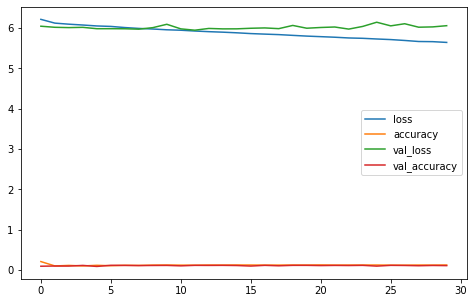

In [177]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [167]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

# to calculate accuracy
from sklearn.metrics import accuracy_score


# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), 
                 padding='valid', activation='relu', 
                 input_shape=(64,64,3)))

model.add(MaxPool2D(pool_size=(5,5)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
history = model.fit(X_train_img, y_train_clf2, validation_split=.1,
                    epochs=5, batch_size=16)

Epoch 1/5
419/419 [==============================] - 4s 9ms/step - loss: 0.6947 - accuracy: 0.5069 - val_loss: 0.6939 - val_accuracy: 0.4960
Epoch 2/5
419/419 [==============================] - 4s 9ms/step - loss: 0.6909 - accuracy: 0.5323 - val_loss: 0.6935 - val_accuracy: 0.5255
Epoch 3/5
419/419 [==============================] - 4s 9ms/step - loss: 0.6803 - accuracy: 0.5701 - val_loss: 0.7025 - val_accuracy: 0.5202
Epoch 4/5
419/419 [==============================] - 4s 9ms/step - loss: 0.6436 - accuracy: 0.6184 - val_loss: 0.7323 - val_accuracy: 0.5188
Epoch 5/5
419/419 [==============================] - 4s 9ms/step - loss: 0.5492 - accuracy: 0.7103 - val_loss: 0.8007 - val_accuracy: 0.4973


<AxesSubplot:>

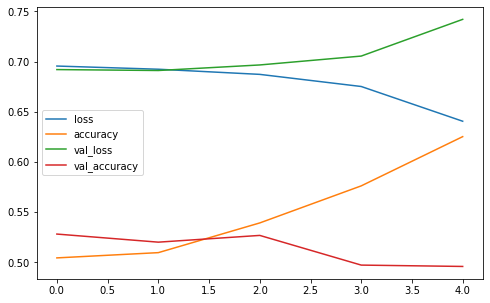

In [166]:
pd.DataFrame(history.history).plot(figsize=(8,5))

### preds = model.predict(X_test_img)

In [140]:
p_ser = pd.Series(preds.reshape(-1))

In [141]:
p_ser = p_ser.map(lambda x: 0 if x < .5 else 1)

In [142]:
p_ser

0       1
1       0
2       0
3       1
4       1
       ..
2473    0
2474    1
2475    1
2476    1
2477    0
Length: 2478, dtype: int64

In [143]:
accuracy_score(y_test_clf2, p_ser)

0.4923325262308313

In [ ]:
X_train

## Dog Detection

In [53]:
img = load_img('../data/train/0007de18844b0dbbb5e1f607da0606e0.jpg', target_size=(224, 224))

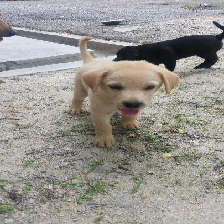

In [54]:
img

In [51]:
from keras.applications.vgg16 import VGG16
# load model
model = VGG16()
# summarize the model
model.summary()

553467904/553467096 [==============================] - 9s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [55]:
# load an image from file
image = load_img('../data/train/0007de18844b0dbbb5e1f607da0606e0.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)

In [57]:
from keras.applications.vgg16 import decode_predictions

# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]

40960/35363 [==================================] - 0s 1us/step


In [58]:
label

('n02085620', 'Chihuahua', 0.19529246)

In [90]:
# Import the ResNet model and the preprocess_input function.
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications import resnet50
# Import the functions to load and transform images
from keras.preprocessing.image import load_img, img_to_array

In [86]:
rn50 = ResNet50(weights='imagenet')

In [87]:
pred = rn50.predict(X_img)

In [94]:
pred

array([[1.5434172e-07, 3.8677152e-07, 7.4936047e-06, ..., 1.5774242e-07,
        3.4427721e-06, 1.9586957e-06],
       [2.5521413e-07, 5.9421886e-06, 1.3507196e-05, ..., 7.0821665e-07,
        9.4503657e-06, 4.1349055e-03],
       [2.7872759e-06, 1.2285189e-07, 2.7512060e-06, ..., 4.8166007e-06,
        2.3906779e-05, 1.3054913e-04],
       ...,
       [4.9002898e-07, 2.5008108e-06, 4.8175575e-06, ..., 2.0006274e-08,
        5.7972034e-07, 1.5646086e-05],
       [1.0163901e-07, 6.6913901e-07, 7.3517704e-08, ..., 6.5149010e-07,
        1.8668656e-05, 5.6219513e-05],
       [2.1731550e-05, 9.0114509e-06, 5.1097841e-06, ..., 5.7038619e-06,
        3.4899681e-04, 9.9804374e-06]], dtype=float32)

In [154]:
clean_preds = resnet50.decode_predictions(pred)

In [163]:
clean_preds[0][0]

('n02098286', 'West_Highland_white_terrier', 0.23131622)

In [165]:
final_preds = []

for i in range(len(clean_preds)):
    
    items_list = []
    
    for j in range(5):
            
        item_pred = clean_preds[i][j][1]
        items_list.append(item_pred)
    
    final_preds.append(items_list)
        

In [168]:
final_preds

[['West_Highland_white_terrier',
  'toy_poodle',
  'Maltese_dog',
  'Chihuahua',
  'Scotch_terrier'],
 ['bannister', 'mosquito_net', 'shower_curtain', 'paper_towel', 'birdhouse'],
 ['keeshond',
  'schipperke',
  'hamster',
  'Border_terrier',
  'miniature_schnauzer'],
 ['Eskimo_dog',
  'American_Staffordshire_terrier',
  'ice_bear',
  'Staffordshire_bullterrier',
  'pug'],
 ['seashore', 'paper_towel', 'sandal', 'diaper', 'bib'],
 ['swab', 'bathtub', 'sleeping_bag', 'Persian_cat', 'electric_ray'],
 ['sandal', 'miniature_pinscher', 'Chihuahua', 'pug', 'French_bulldog'],
 ['pug', 'jigsaw_puzzle', 'Scotch_terrier', 'web_site', 'toy_poodle'],
 ['Persian_cat', 'tabby', 'lynx', 'window_screen', 'bib'],
 ['Egyptian_cat', 'tabby', 'tiger_cat', 'carton', 'lynx'],
 ['Egyptian_cat', 'tabby', 'tiger_cat', 'lynx', 'window_screen'],
 ['Chihuahua',
  'toy_terrier',
  'miniature_pinscher',
  'Siamese_cat',
  'French_bulldog'],
 ['can_opener', 'corkscrew', 'envelope', 'screw', 'cockroach'],
 ['teddy', '

In [330]:
df_wow = pd.DataFrame(final_preds)

In [331]:
df_wow

,0,1,2,3,4
0,West_Highland_white_terrier,toy_poodle,Maltese_dog,Chihuahua,Scotch_terrier
1,bannister,mosquito_net,shower_curtain,paper_towel,birdhouse
2,keeshond,schipperke,hamster,Border_terrier,miniature_schnauzer
3,Eskimo_dog,American_Staffordshire_terrier,ice_bear,Staffordshire_bullterrier,pug
4,seashore,paper_towel,sandal,diaper,bib
...,...,...,...,...,...
9907,Egyptian_cat,tabby,tiger_cat,cougar,lynx
9908,Labrador_retriever,Weimaraner,Chesapeake_Bay_retriever,boxer,Doberman
9909,Siamese_cat,Egyptian_cat,tabby,lynx,Persian_cat
9910,Chihuahua,miniature_pinscher,miniature_schnauzer,toy_poodle,beagle


In [379]:
df_wow[0].value_counts().sort_values()[-100:-50]

Eskimo_dog            13
malamute              13
diaper                13
swab                  15
wood_rabbit           15
white_wolf            15
wombat                15
grey_fox              16
skunk                 16
window_shade          17
shower_curtain        17
mosquito_net          17
carton                17
clumber               17
chow                  17
Brittany_spaniel      18
Scottish_deerhound    18
quilt                 18
llama                 18
hippopotamus          19
fountain              19
ice_bear              20
koala                 20
basset                21
boxer                 21
Boston_bull           22
dalmatian             22
English_springer      22
tub                   22
Great_Dane            23
hare                  24
Norwegian_elkhound    24
Border_terrier        24
Great_Pyrenees        25
whippet               26
doormat               26
bathtub               26
giant_schnauzer       26
shopping_cart         27
pillow                27


In [332]:
df_im_lost = pd.concat([df_wow, df['Pawpularity']], axis=1)

In [333]:
df_im_lost

,0,1,2,3,4,Pawpularity
0,West_Highland_white_terrier,toy_poodle,Maltese_dog,Chihuahua,Scotch_terrier,63
1,bannister,mosquito_net,shower_curtain,paper_towel,birdhouse,42
2,keeshond,schipperke,hamster,Border_terrier,miniature_schnauzer,28
3,Eskimo_dog,American_Staffordshire_terrier,ice_bear,Staffordshire_bullterrier,pug,15
4,seashore,paper_towel,sandal,diaper,bib,72
...,...,...,...,...,...,...
9907,Egyptian_cat,tabby,tiger_cat,cougar,lynx,15
9908,Labrador_retriever,Weimaraner,Chesapeake_Bay_retriever,boxer,Doberman,70
9909,Siamese_cat,Egyptian_cat,tabby,lynx,Persian_cat,20
9910,Chihuahua,miniature_pinscher,miniature_schnauzer,toy_poodle,beagle,20


In [354]:
df_im_lost['Pawpularity'].mean()

38.03904358353511

In [355]:
df_im_lost['Pawpularity'].std()

20.59199010577444

In [345]:
df_im_lost[df_im_lost[0]=='paper_towel']['Pawpularity'].mean()

35.5

<AxesSubplot:>

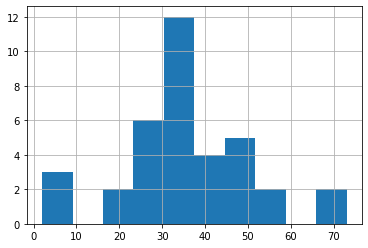

In [346]:
df_im_lost[df_im_lost[0]=='paper_towel']['Pawpularity'].hist()

In [347]:
wow_list1 = []

Eskimo_dog
Number of instances: 13
Mean: 32.49
Std: 15.31


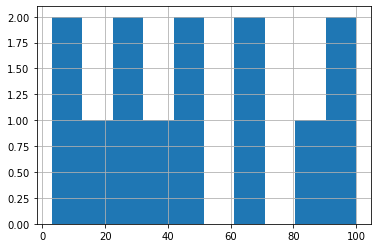

malamute
Number of instances: 13
Mean: 48.46
Std: 33.6


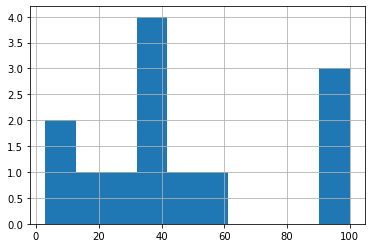

diaper
Number of instances: 13
Mean: 46.62
Std: 33.37


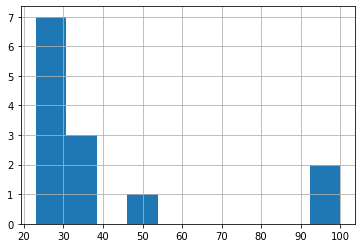

swab
Number of instances: 15
Mean: 40.62
Std: 27.5


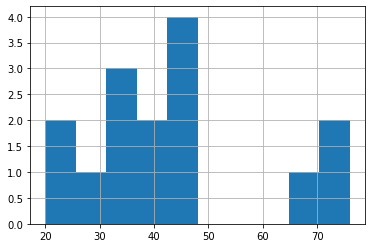

wood_rabbit
Number of instances: 15
Mean: 42.67
Std: 17.44


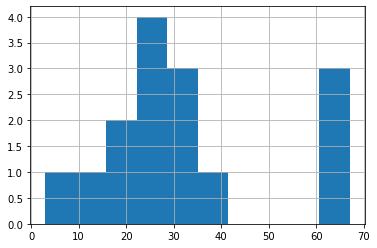

white_wolf
Number of instances: 15
Mean: 31.93
Std: 18.79


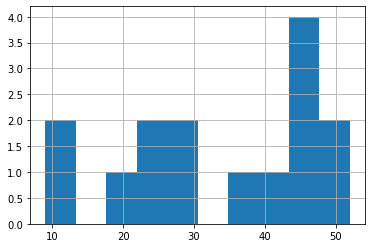

wombat
Number of instances: 15
Mean: 33.6
Std: 13.84


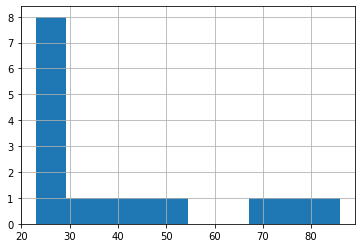

grey_fox
Number of instances: 16
Mean: 40.6
Std: 20.99


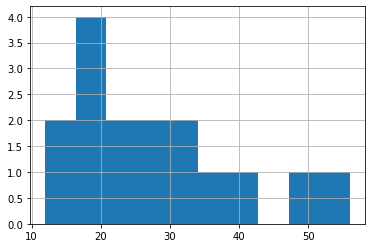

skunk
Number of instances: 16
Mean: 28.0
Std: 12.51


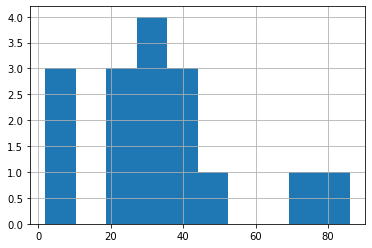

window_shade
Number of instances: 17
Mean: 32.88
Std: 23.49


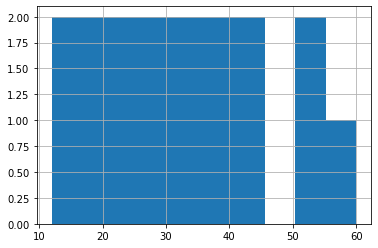

shower_curtain
Number of instances: 17
Mean: 33.47
Std: 13.83


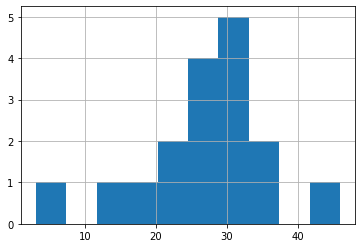

mosquito_net
Number of instances: 17
Mean: 27.06
Std: 9.4


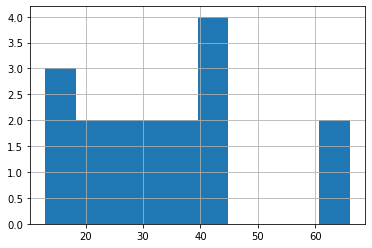

carton
Number of instances: 17
Mean: 33.18
Std: 15.48


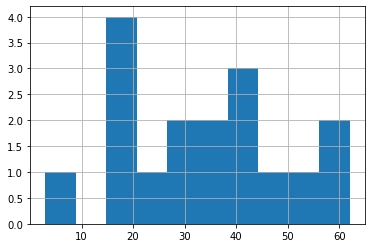

clumber
Number of instances: 17
Mean: 33.82
Std: 16.17


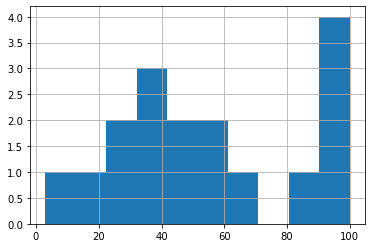

chow
Number of instances: 17
Mean: 56.12
Std: 31.47


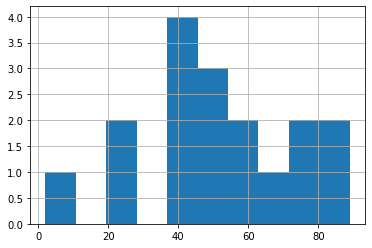

Brittany_spaniel
Number of instances: 18
Mean: 51.53
Std: 22.78


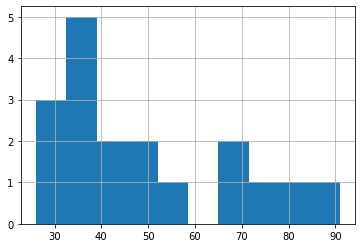

Scottish_deerhound
Number of instances: 18
Mean: 50.22
Std: 19.74


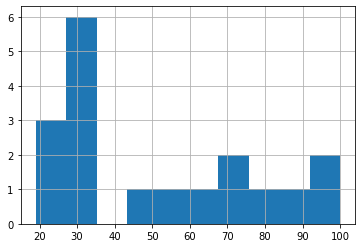

quilt
Number of instances: 18
Mean: 51.22
Std: 26.45


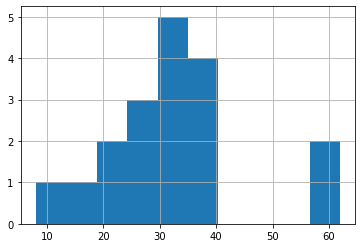

llama
Number of instances: 18
Mean: 32.11
Std: 13.07


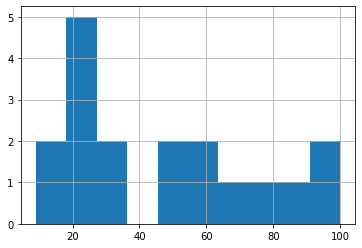

hippopotamus
Number of instances: 19
Mean: 46.39
Std: 29.61


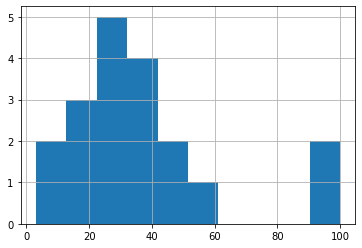

fountain
Number of instances: 19
Mean: 37.42
Std: 25.95


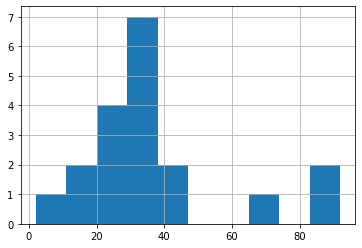

ice_bear
Number of instances: 20
Mean: 35.84
Std: 22.6


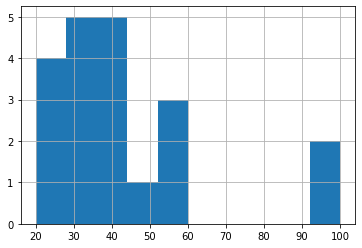

koala
Number of instances: 20
Mean: 42.9
Std: 22.56


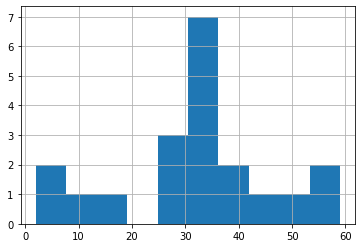

basset
Number of instances: 21
Mean: 32.1
Std: 14.66


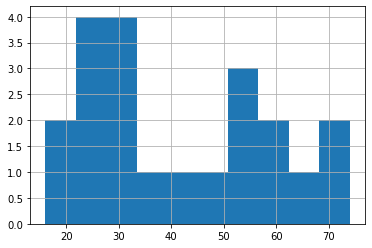

boxer
Number of instances: 21
Mean: 41.1
Std: 18.17


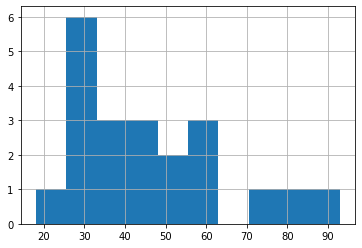

Boston_bull
Number of instances: 22
Mean: 45.38
Std: 19.91


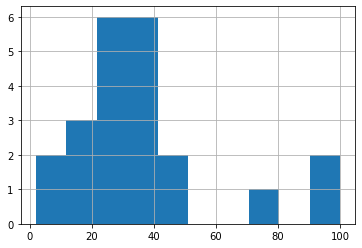

dalmatian
Number of instances: 22
Mean: 36.18
Std: 25.51


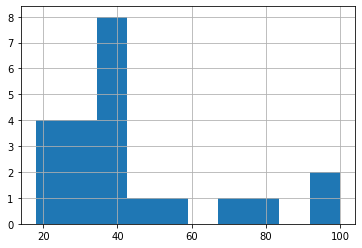

English_springer
Number of instances: 22
Mean: 43.5
Std: 23.83


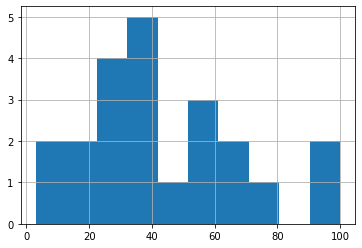

tub
Number of instances: 22
Mean: 43.77
Std: 26.59


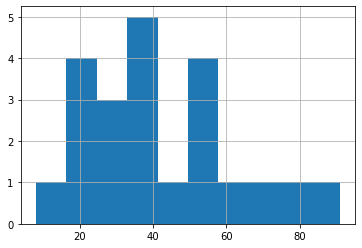

Great_Dane
Number of instances: 23
Mean: 41.41
Std: 20.94


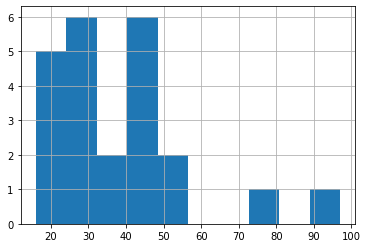

hare
Number of instances: 24
Mean: 38.48
Std: 19.15


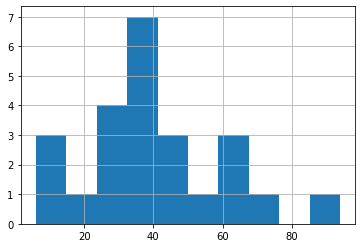

Norwegian_elkhound
Number of instances: 24
Mean: 40.17
Std: 20.03


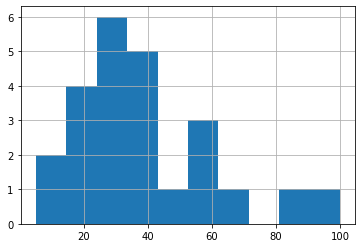

Border_terrier
Number of instances: 24
Mean: 38.25
Std: 22.86


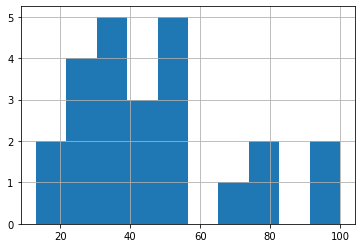

Great_Pyrenees
Number of instances: 25
Mean: 46.88
Std: 23.76


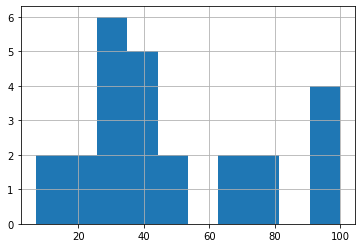

whippet
Number of instances: 26
Mean: 48.68
Std: 28.47


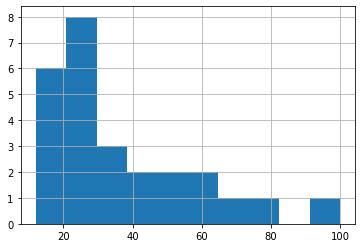

doormat
Number of instances: 26
Mean: 36.65
Std: 22.52


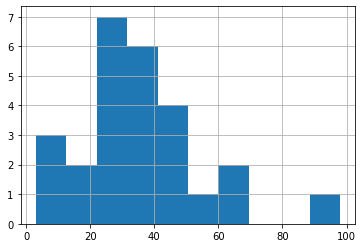

bathtub
Number of instances: 26
Mean: 36.19
Std: 19.95


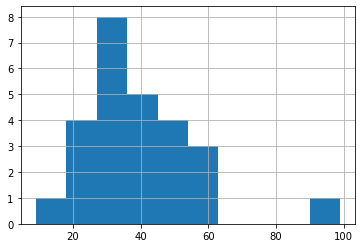

giant_schnauzer
Number of instances: 26
Mean: 38.73
Std: 17.09


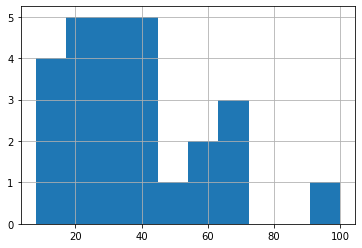

shopping_cart
Number of instances: 27
Mean: 38.5
Std: 21.93


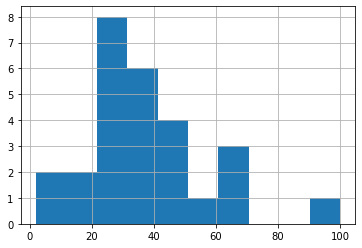

pillow
Number of instances: 27
Mean: 37.89
Std: 20.51


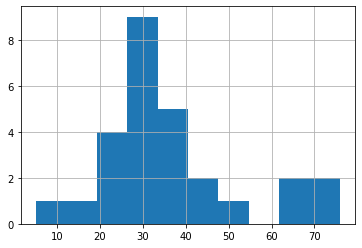

toy_terrier
Number of instances: 27
Mean: 36.63
Std: 16.78


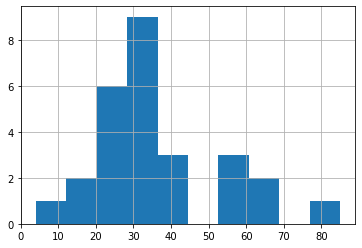

hamster
Number of instances: 32
Mean: 36.0
Std: 17.75


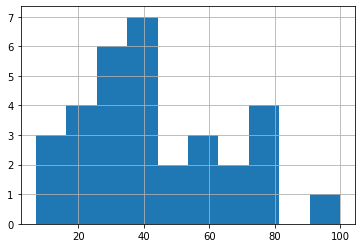

teddy
Number of instances: 32
Mean: 42.84
Std: 23.03


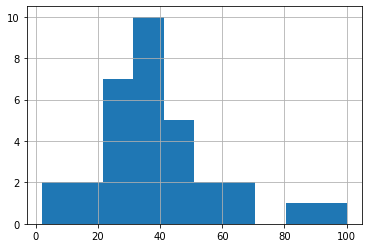

seat_belt
Number of instances: 32
Mean: 39.69
Std: 19.98


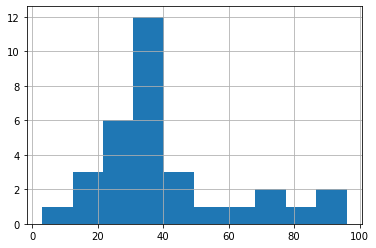

washbasin
Number of instances: 32
Mean: 40.34
Std: 22.53


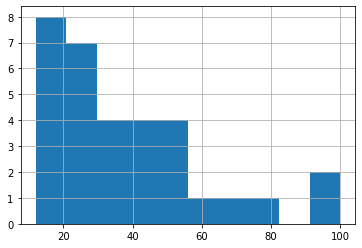

bluetick
Number of instances: 33
Mean: 38.19
Std: 22.68


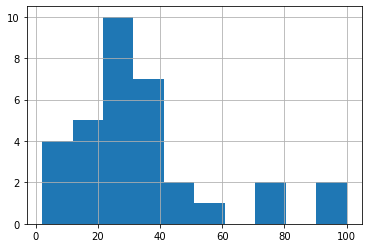

papillon
Number of instances: 33
Mean: 34.18
Std: 23.91


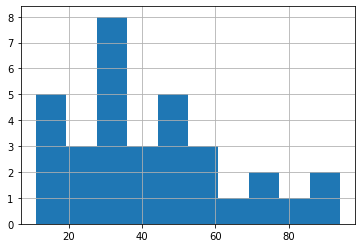

Scotch_terrier
Number of instances: 33
Mean: 42.12
Std: 22.4


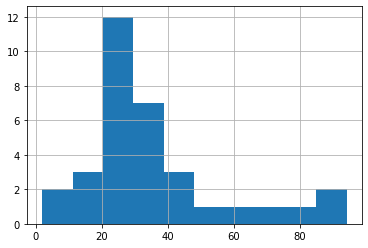

groenendael
Number of instances: 34
Mean: 35.94
Std: 21.75


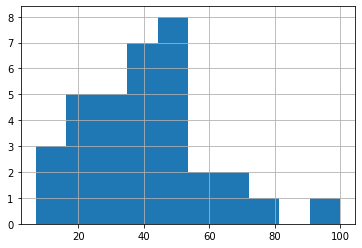

Cardigan
Number of instances: 34
Mean: 41.12
Std: 18.92


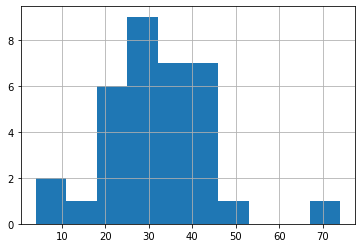

paper_towel
Number of instances: 36
Mean: 31.88
Std: 12.75


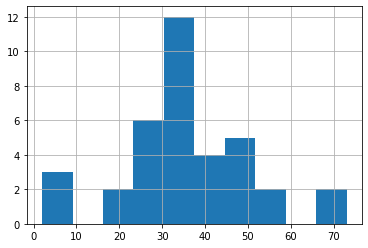

Ibizan_hound
Number of instances: 37
Mean: 35.5
Std: 15.45


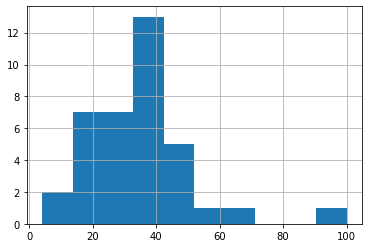

cocker_spaniel
Number of instances: 37
Mean: 34.86
Std: 16.38


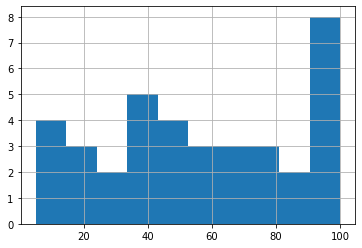

Samoyed
Number of instances: 38
Mean: 56.78
Std: 31.79


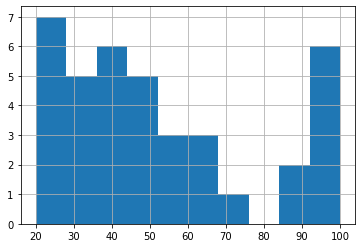

platypus
Number of instances: 39
Mean: 52.55
Std: 26.64


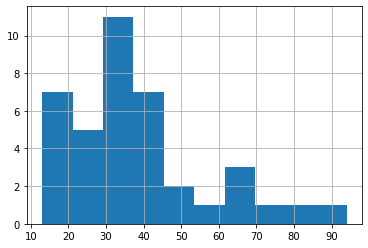

Maltese_dog
Number of instances: 43
Mean: 38.56
Std: 19.13


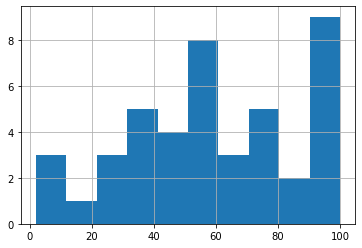

Mexican_hairless
Number of instances: 43
Mean: 59.84
Std: 28.99


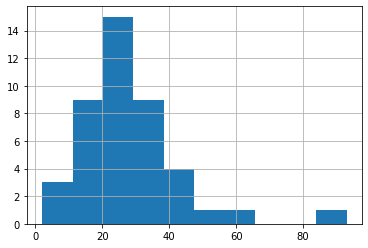

Pomeranian
Number of instances: 48
Mean: 28.51
Std: 15.35


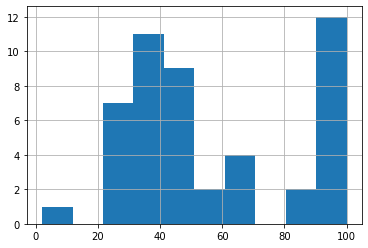

English_setter
Number of instances: 48
Mean: 56.58
Std: 28.85


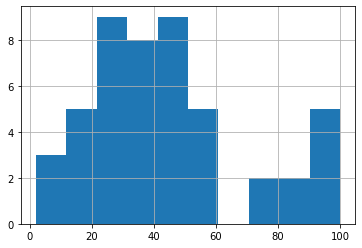

jigsaw_puzzle
Number of instances: 52
Mean: 45.23
Std: 26.32


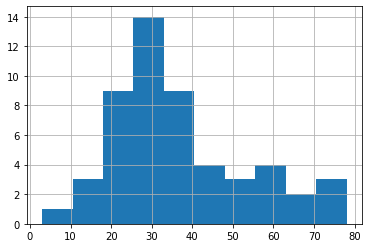

German_short-haired_pointer
Number of instances: 52
Mean: 36.67
Std: 17.1


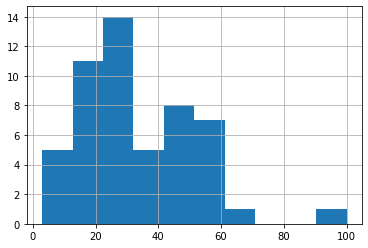

bath_towel
Number of instances: 56
Mean: 33.5
Std: 18.73


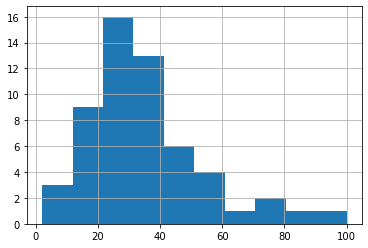

wallaby
Number of instances: 56
Mean: 35.11
Std: 19.19


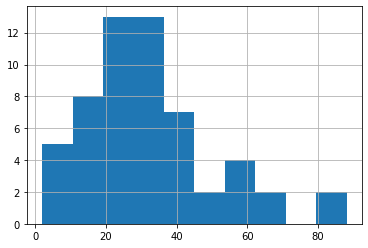

Angora
Number of instances: 57
Mean: 31.82
Std: 18.3


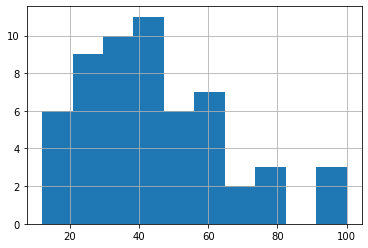

weasel
Number of instances: 58
Mean: 43.49
Std: 21.42


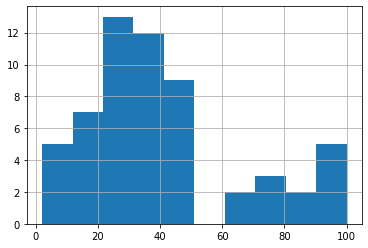

American_Staffordshire_terrier
Number of instances: 59
Mean: 40.93
Std: 25.22


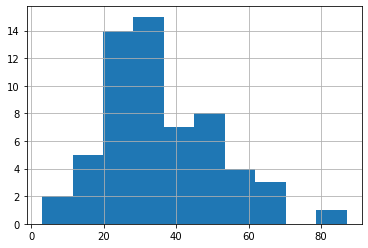

Shih-Tzu
Number of instances: 59
Mean: 35.73
Std: 15.86


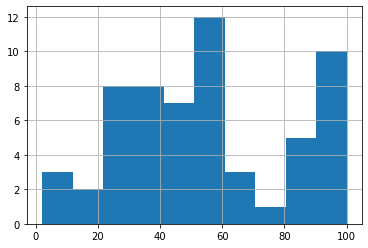

triceratops
Number of instances: 62
Mean: 54.95
Std: 28.16


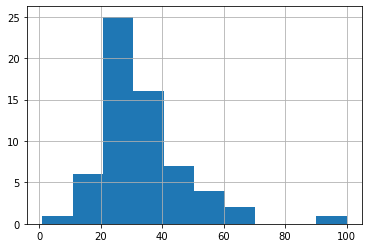

Lakeland_terrier
Number of instances: 62
Mean: 33.47
Std: 15.58


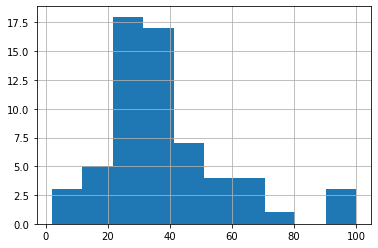

standard_poodle
Number of instances: 63
Mean: 37.84
Std: 20.73


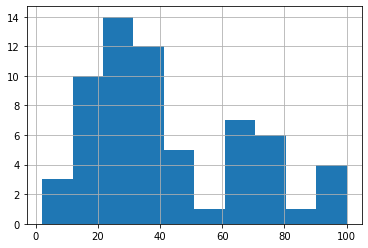

borzoi
Number of instances: 65
Mean: 42.79
Std: 25.03


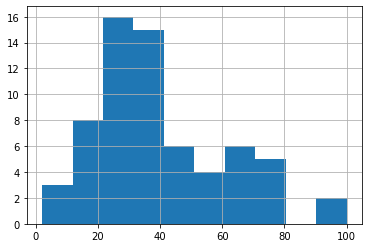

beagle
Number of instances: 73
Mean: 40.17
Std: 21.15


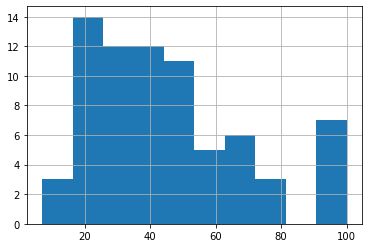

Italian_greyhound
Number of instances: 76
Mean: 45.73
Std: 24.28


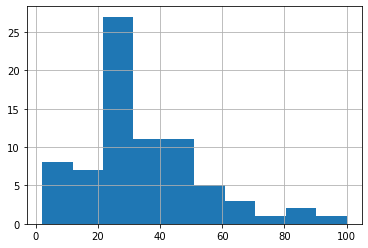

kuvasz
Number of instances: 76
Mean: 34.14
Std: 19.4


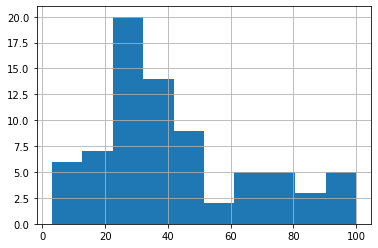

miniature_schnauzer
Number of instances: 86
Mean: 42.47
Std: 24.74


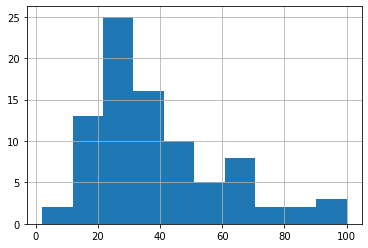

Staffordshire_bullterrier
Number of instances: 100
Mean: 38.42
Std: 21.06


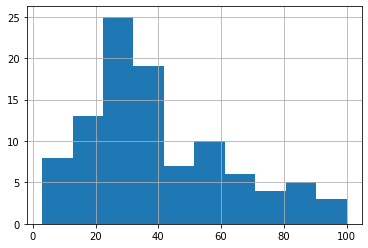

window_screen
Number of instances: 106
Mean: 39.79
Std: 22.54


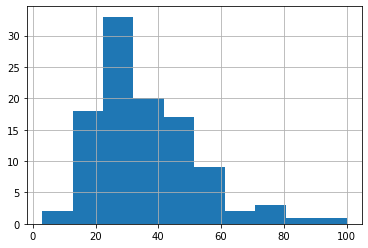

West_Highland_white_terrier
Number of instances: 108
Mean: 36.2
Std: 16.58


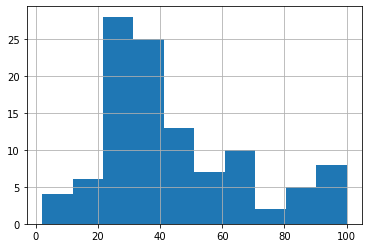

French_bulldog
Number of instances: 114
Mean: 43.82
Std: 23.91


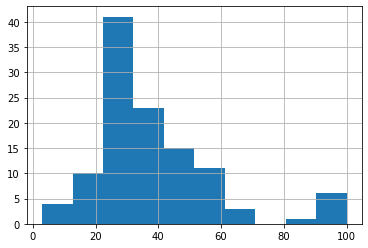

wire-haired_fox_terrier
Number of instances: 123
Mean: 38.79
Std: 19.5


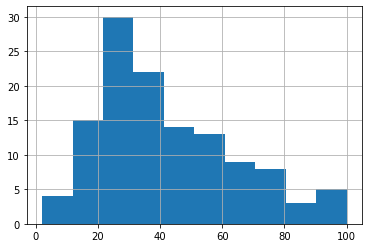

Bedlington_terrier
Number of instances: 125
Mean: 42.04
Std: 22.3


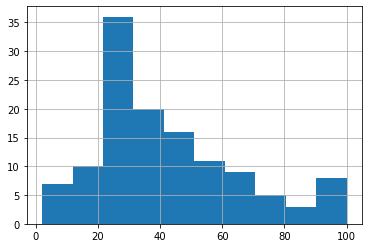

Madagascar_cat
Number of instances: 130
Mean: 41.93
Std: 23.36


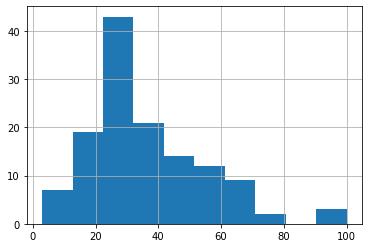

lynx
Number of instances: 131
Mean: 36.08
Std: 18.47


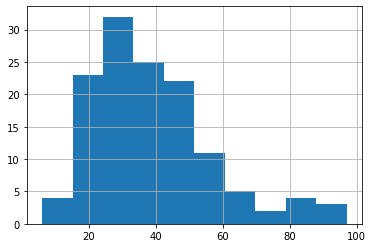

web_site
Number of instances: 132
Mean: 38.92
Std: 17.9


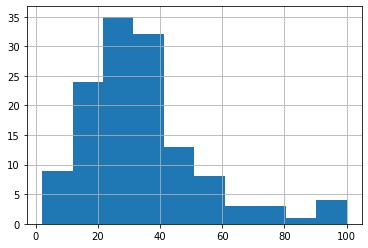

Siberian_husky
Number of instances: 139
Mean: 34.3
Std: 19.05


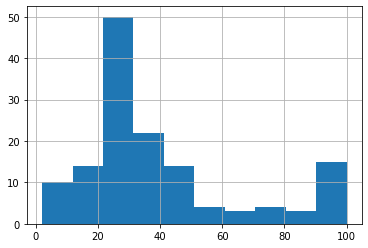

Chesapeake_Bay_retriever
Number of instances: 141
Mean: 39.78
Std: 26.53


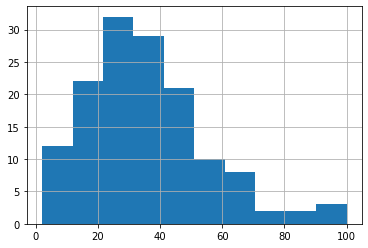

Weimaraner
Number of instances: 144
Mean: 35.23
Std: 19.76


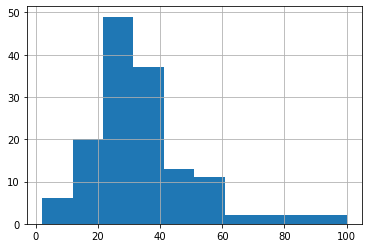

tiger_cat
Number of instances: 153
Mean: 33.61
Std: 16.89


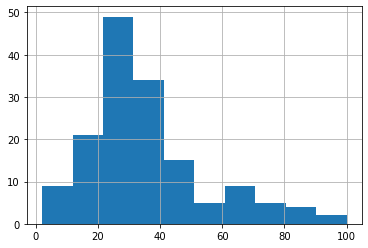

schipperke
Number of instances: 200
Mean: 34.84
Std: 19.47


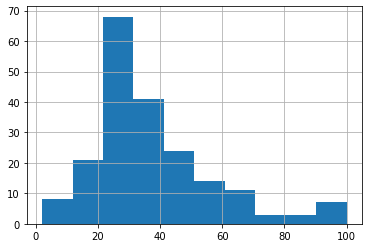

Persian_cat
Number of instances: 201
Mean: 37.44
Std: 19.75


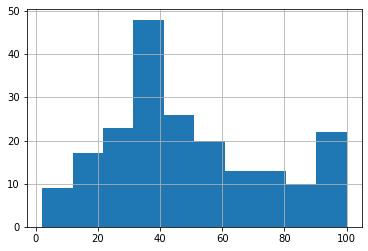

pug
Number of instances: 202
Mean: 48.78
Std: 26.13


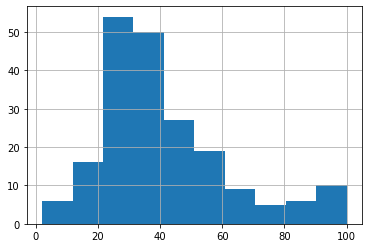

Arctic_fox
Number of instances: 204
Mean: 40.85
Std: 21.37


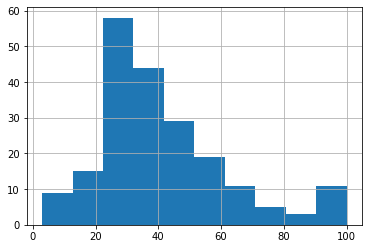

Labrador_retriever
Number of instances: 217
Mean: 41.25
Std: 21.0


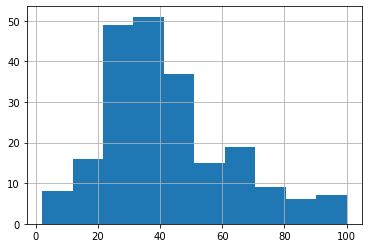

toy_poodle
Number of instances: 243
Mean: 41.75
Std: 20.39


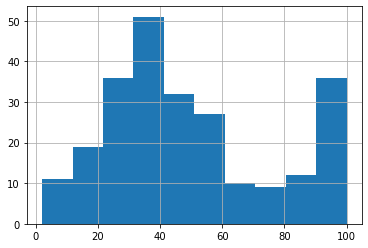

miniature_pinscher
Number of instances: 283
Mean: 49.67
Std: 27.45


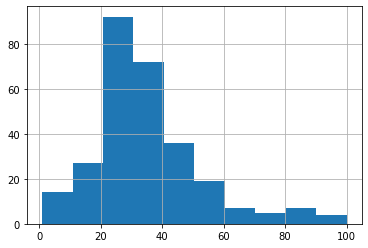

kelpie
Number of instances: 310
Mean: 35.26
Std: 17.78


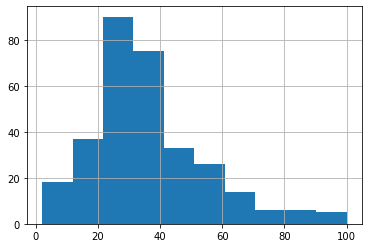

tabby
Number of instances: 356
Mean: 36.27
Std: 18.47


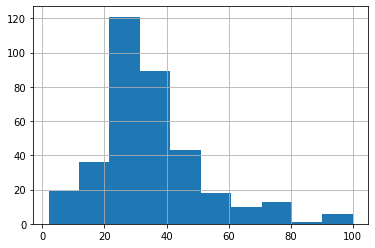

Chihuahua
Number of instances: 457
Mean: 35.04
Std: 17.29


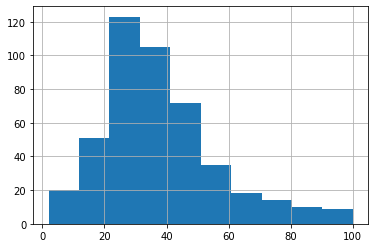

Siamese_cat
Number of instances: 809
Mean: 37.82
Std: 18.72


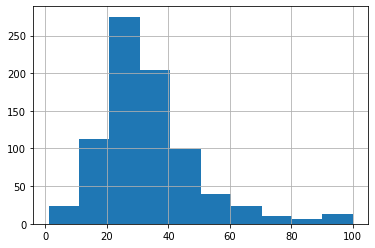

Egyptian_cat
Number of instances: 1220
Mean: 33.52
Std: 16.6


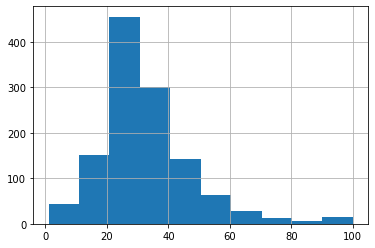

In [383]:
wow_list1 = []

for label in df_im_lost[0].value_counts().sort_values()[-100:].index:
    
    mean = temp['Pawpularity'].mean()
    std = temp['Pawpularity'].std()
    plt.figure()
    temp = df_im_lost[df_im_lost[0]==label]
    print(label)
    print('Number of instances: ' + str(len(temp)))
    print('Mean: ' + str(round(mean, 2)))
    print('Std: ' + str(round(std, 2)))
    temp['Pawpularity'].hist()
    plt.show()
    
    if mean > 45:
        wow_list1.append(label)

borzoi
39.46341463414634
20.39129417297442


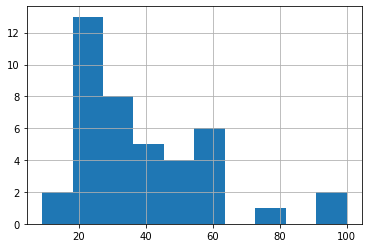

whippet
37.73170731707317
17.38537372368495


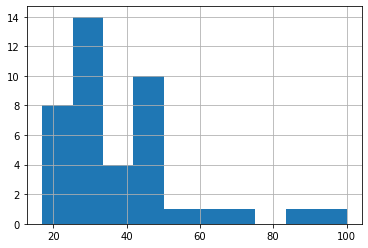

grey_fox
28.341463414634145
17.46225895481103


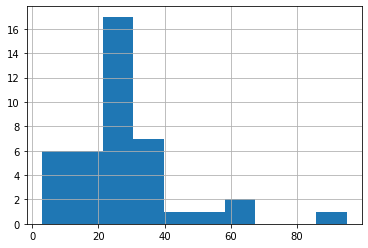

Border_terrier
39.02325581395349
23.08523375923916


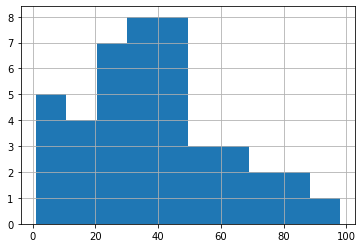

groenendael
37.71111111111111
20.29400070578654


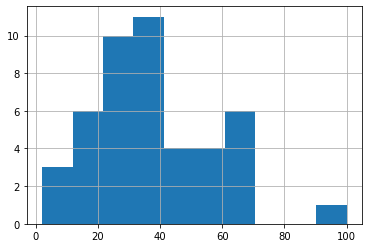

web_site
36.234042553191486
18.85898789985416


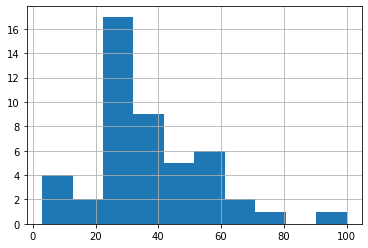

Eskimo_dog
54.916666666666664
33.13661812848299


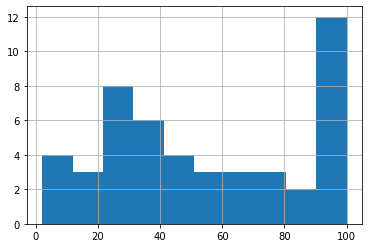

miniature_poodle
60.02
27.668954089523574


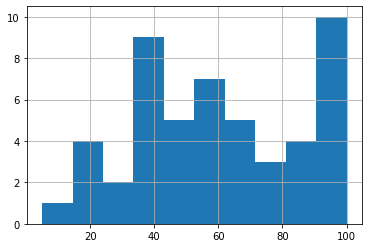

German_short-haired_pointer
34.470588235294116
19.10010779150366


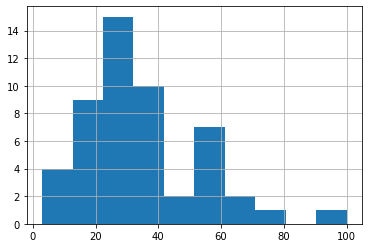

bath_towel
34.490196078431374
18.17731833799431


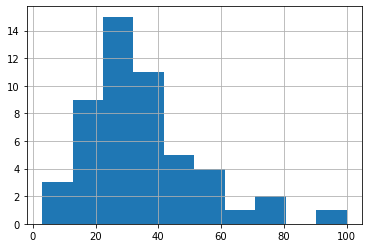

wallaby
32.51923076923077
15.979754819851403


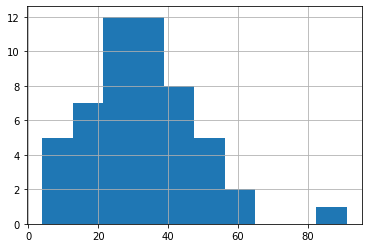

English_setter
47.945454545454545
29.084435306609908


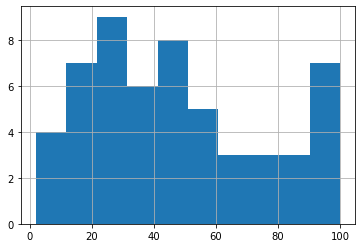

Pomeranian
48.31578947368421
28.14322926359835


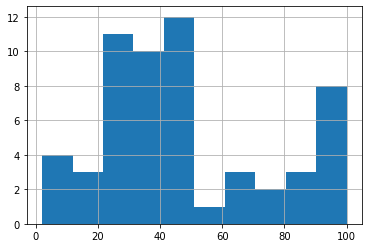

weasel
36.43103448275862
19.962343557673268


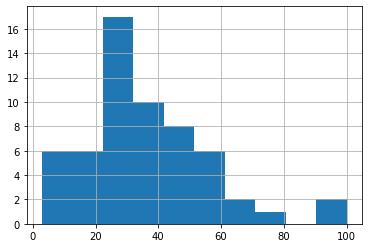

Angora
42.25
25.169005017269196


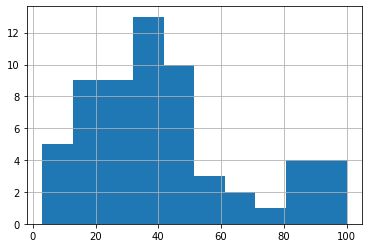

toy_terrier
32.95
17.804422417678104


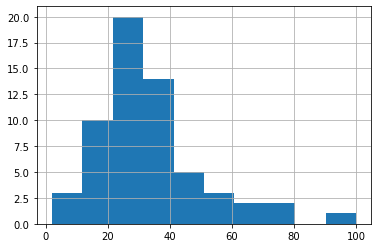

kuvasz
44.63492063492063
20.839092905852713


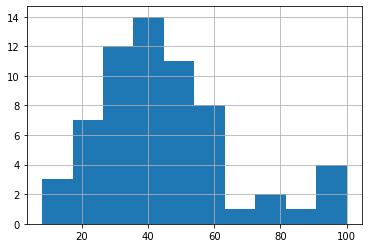

Mexican_hairless
33.0625
17.20361257742936


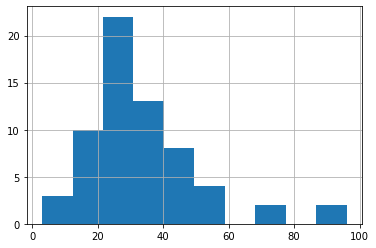

Maltese_dog
55.38235294117647
27.329951538512724


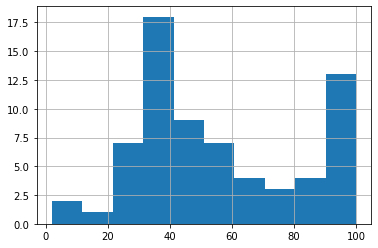

miniature_schnauzer
42.056338028169016
23.079915402137395


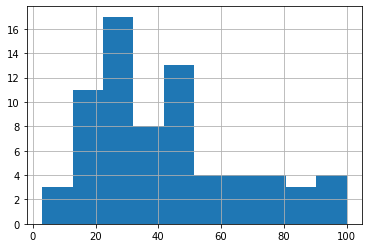

Scotch_terrier
39.056338028169016
19.300545753900074


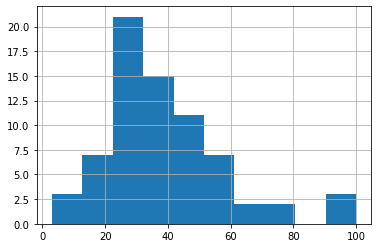

beagle
41.567567567567565
22.69999763507385


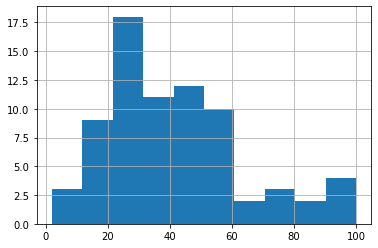

Lakeland_terrier
43.74683544303797
26.619092990785038


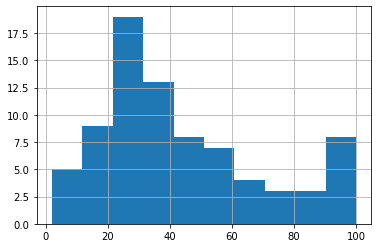

standard_poodle
40.2875
22.855735645538388


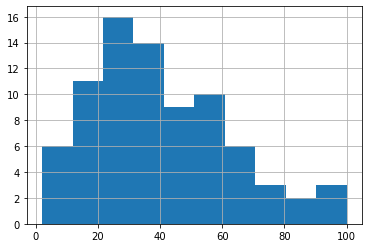

American_Staffordshire_terrier
34.32098765432099
17.160147989232076


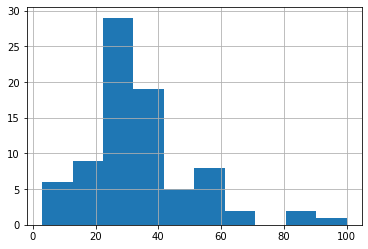

Italian_greyhound
35.86904761904762
19.436507546060493


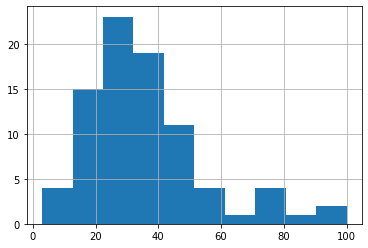

West_Highland_white_terrier
37.935483870967744
17.369893025885773


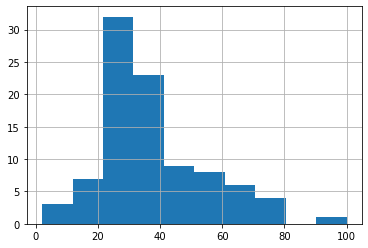

Weimaraner
39.13265306122449
20.40852750569128


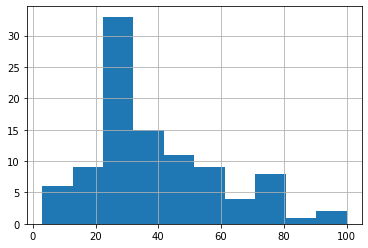

Madagascar_cat
35.65686274509804
17.089453118282183


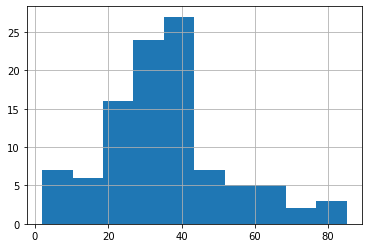

Bedlington_terrier
42.09708737864078
20.118528462884605


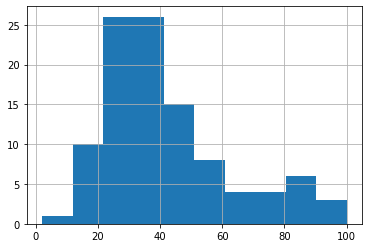

wire-haired_fox_terrier
36.25
20.003276430654182


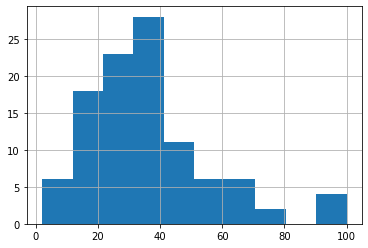

Staffordshire_bullterrier
40.01923076923077
18.508974873256754


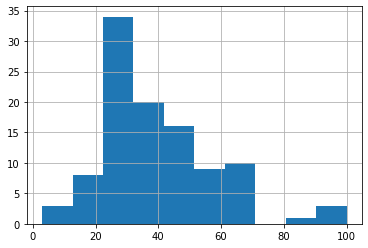

window_screen
37.090090090090094
18.17018014097401


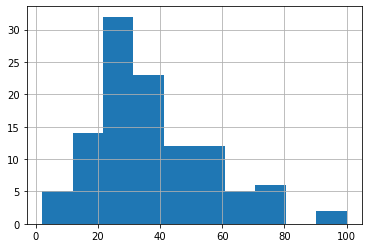

Chesapeake_Bay_retriever
38.8235294117647
18.682742448682117


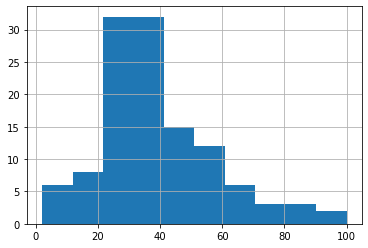

Arctic_fox
41.113821138211385
24.502995217390954


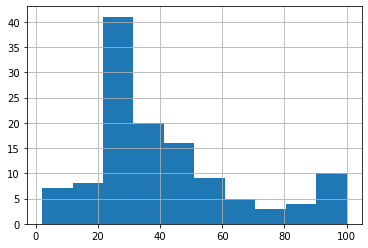

French_bulldog
36.56
18.41782096319372


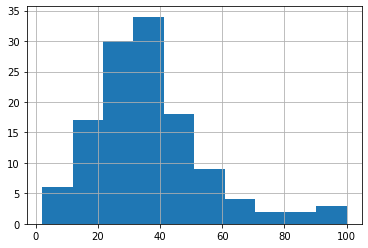

Siberian_husky
37.06106870229008
21.36559265778323


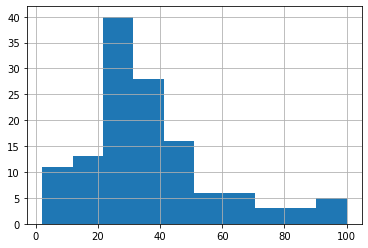

schipperke
39.0974025974026
19.7599216347972


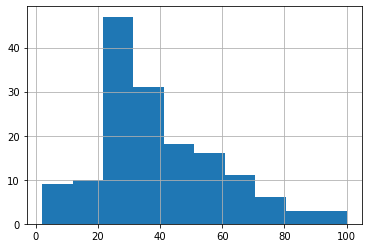

Persian_cat
46.37125748502994
23.62138377192945


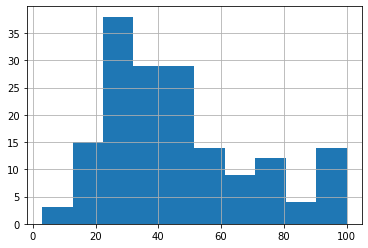

pug
41.02923976608187
22.34000023713329


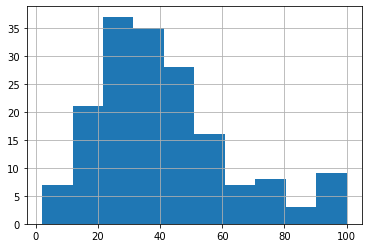

Labrador_retriever
43.326829268292684
22.77910790733564


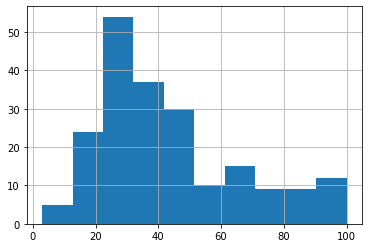

toy_poodle
44.45238095238095
26.11421580348938


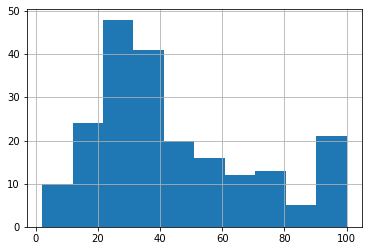

lynx
37.8498023715415
20.16069298480225


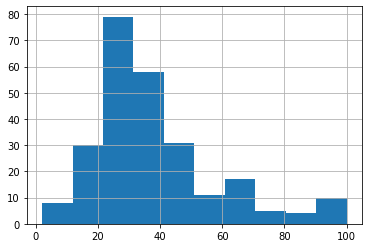

kelpie
35.58181818181818
18.099976720042807


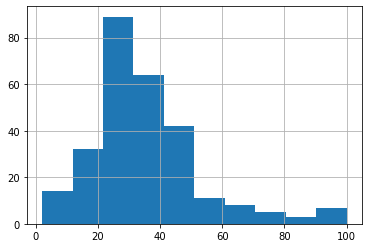

miniature_pinscher
34.12758620689655
17.59170527548319


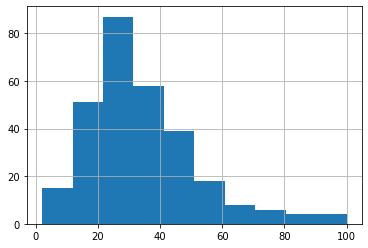

tiger_cat
33.96638655462185
16.557322681467728


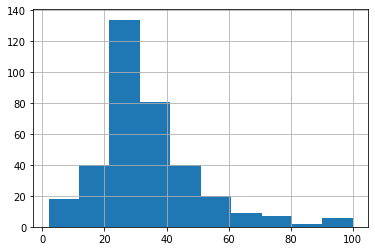

Chihuahua
36.55347593582888
18.499940618793435


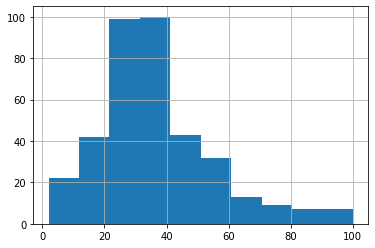

tabby
33.91512915129151
17.26032579273272


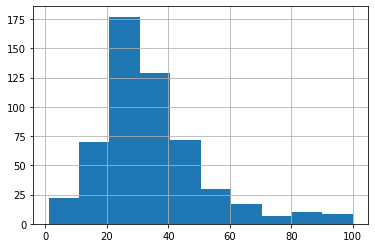

Siamese_cat
34.38
16.40069637332679


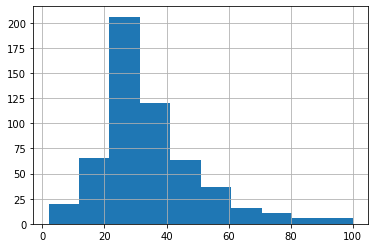

Egyptian_cat
32.43554006968641
15.07838713823676


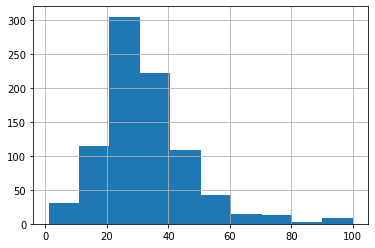

In [357]:
wow_list2 = []

for label in df_im_lost[1].value_counts().sort_values()[-50:].index:
    
    mean = temp['Pawpularity'].mean()
    plt.figure()
    temp = df_im_lost[df_im_lost[1]==label]
    print(label)
    print(temp['Pawpularity'].mean())
    print(temp['Pawpularity'].std())
    temp['Pawpularity'].hist()
    plt.show()
    
    if mean > 45:
        wow_list2.append(label)

borzoi
43.627906976744185
26.82662435131149


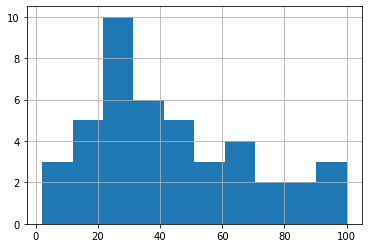

Scotch_terrier
34.06976744186046
18.629719406977774


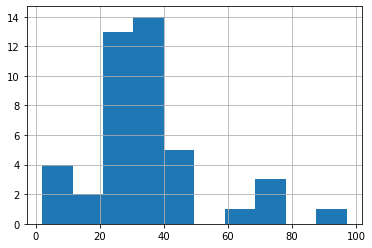

grey_fox
29.977777777777778
15.227798875276052


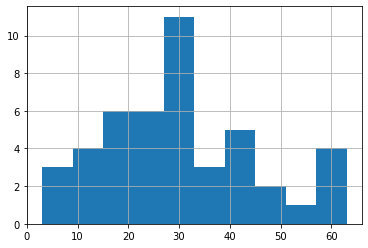

giant_schnauzer
42.82222222222222
27.021278558748755


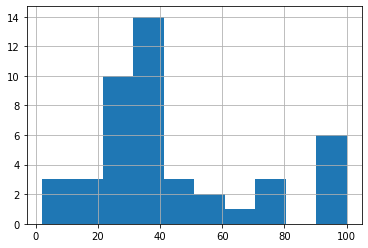

paper_towel
36.5531914893617
16.743341974126153


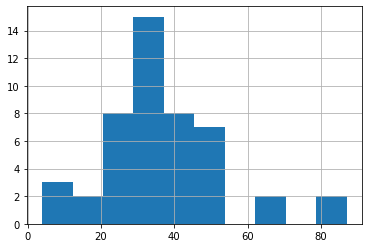

Shih-Tzu
62.75
31.291015636672263


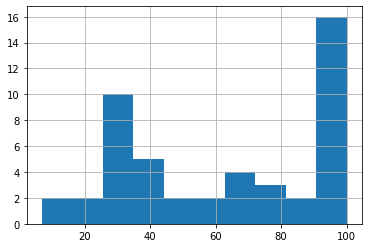

Ibizan_hound
37.86
21.556768907104


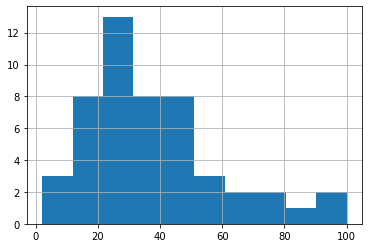

malamute
46.94
30.351283468137968


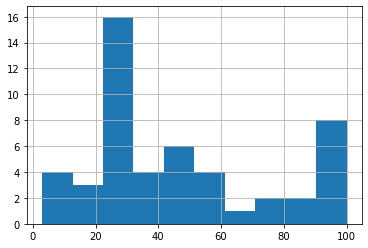

miniature_poodle
46.98039215686274
28.864850733082566


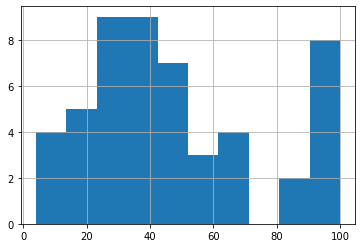

wallaby
34.425925925925924
17.358160336238413


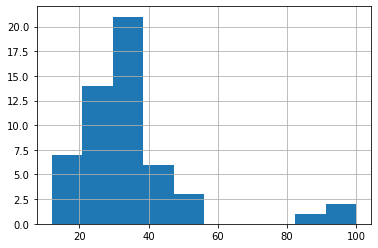

Eskimo_dog
33.407407407407405
22.64535315614964


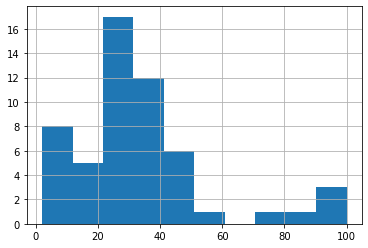

Angora
44.370370370370374
25.82400250775652


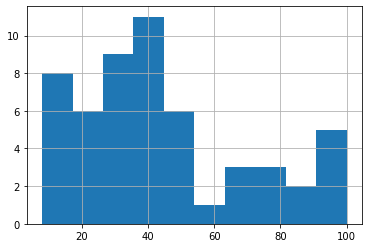

Maltese_dog
58.36206896551724
32.37699978290961


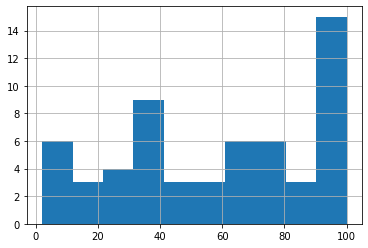

Pomeranian
45.25806451612903
25.153910157120517


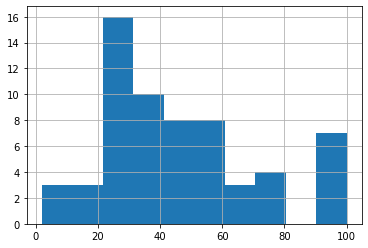

bath_towel
37.390625
22.511102860236036


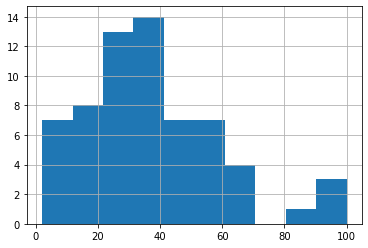

beagle
39.014925373134325
21.18711196109376


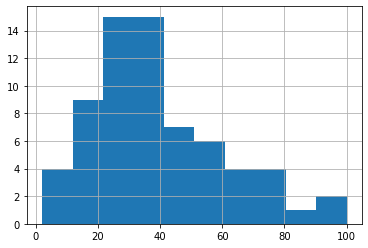

miniature_schnauzer
41.794117647058826
22.700226064709966


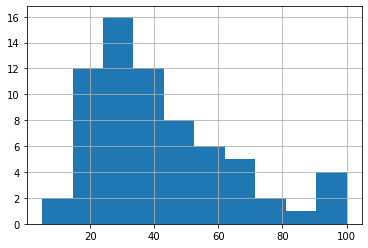

Madagascar_cat
36.04225352112676
19.224565103547157


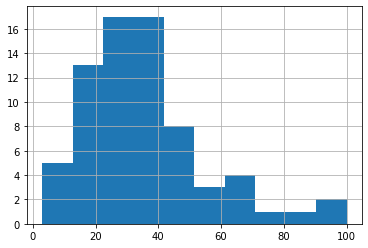

Italian_greyhound
32.567567567567565
16.94316129151129


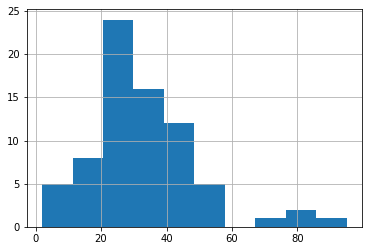

Lakeland_terrier
41.373333333333335
23.516396426767876


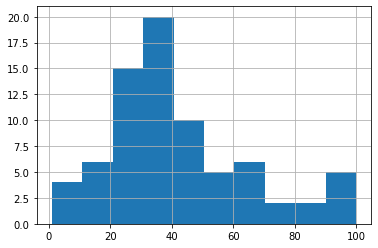

English_setter
41.08
20.651392204885365


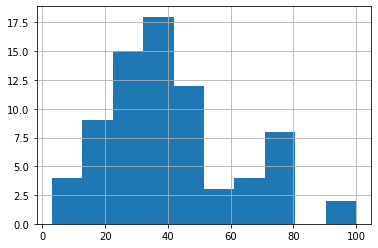

standard_poodle
47.883116883116884
22.54117520518607


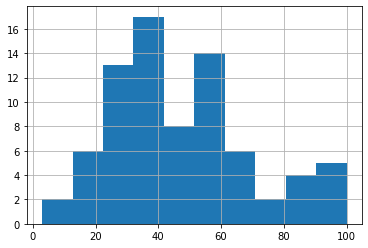

kuvasz
42.91139240506329
24.68945060371484


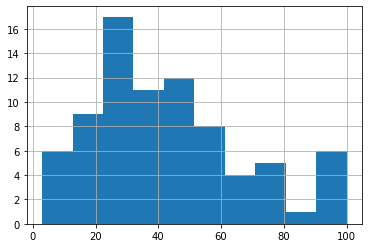

weasel
36.177215189873415
16.857441097347355


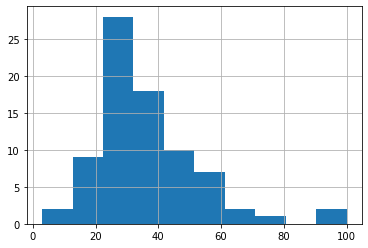

American_Staffordshire_terrier
38.875
16.606674729445995


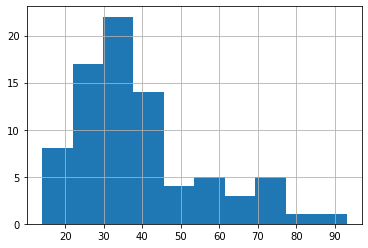

toy_terrier
39.37647058823529
20.53566958952632


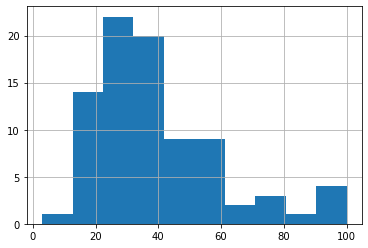

Bedlington_terrier
39.61363636363637
21.504039619527365


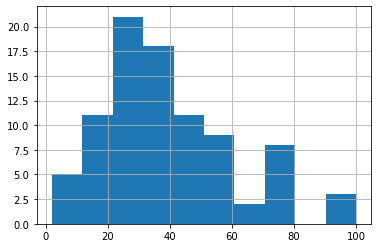

Mexican_hairless
32.51685393258427
14.755670989603349


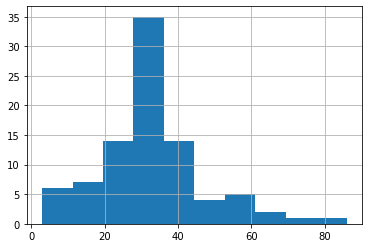

Chesapeake_Bay_retriever
40.1
19.38669183292289


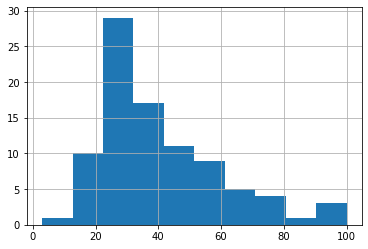

West_Highland_white_terrier
41.10526315789474
21.148650016878005


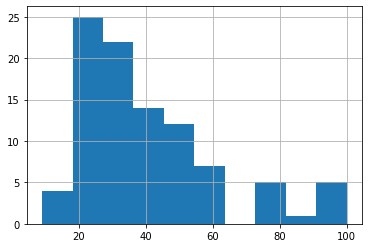

Staffordshire_bullterrier
41.61764705882353
19.74843977677157


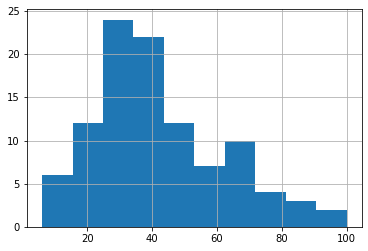

Weimaraner
36.620370370370374
20.089853110273975


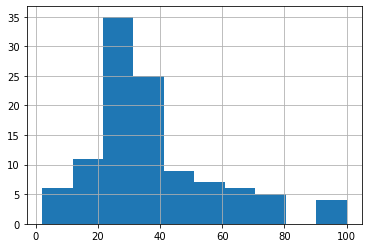

Arctic_fox
35.526785714285715
18.287966713449215


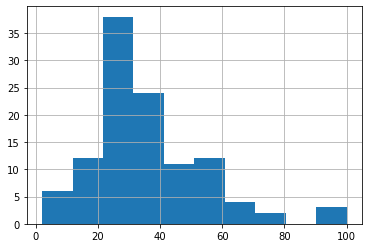

French_bulldog
35.87179487179487
18.67671353978571


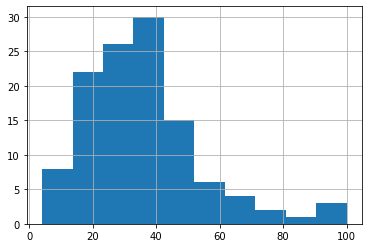

wire-haired_fox_terrier
38.858333333333334
19.813116711853667


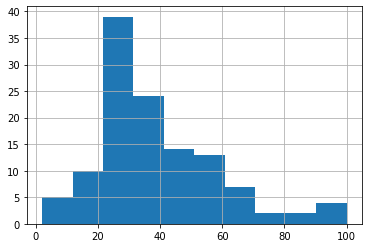

schipperke
40.32846715328467
22.987243741670873


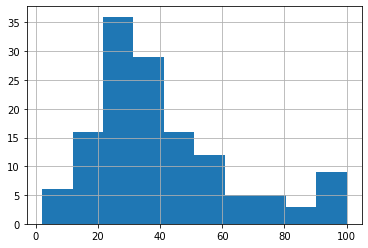

pug
40.27972027972028
21.225617525947868


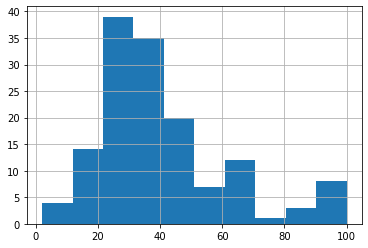

Persian_cat
44.39310344827586
21.975458708309436


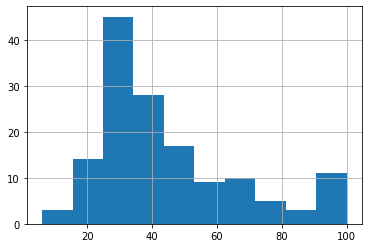

window_screen
35.10596026490066
19.039311023206974


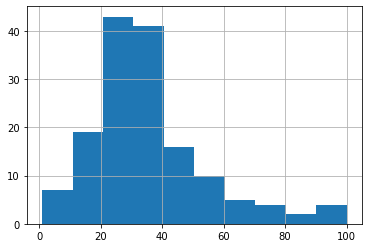

Siberian_husky
38.34117647058824
18.472146273696502


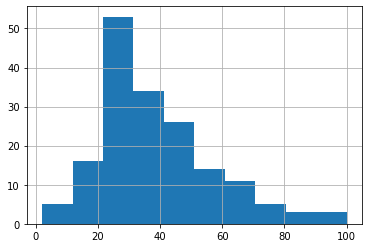

Labrador_retriever
38.12280701754386
20.540694336828277


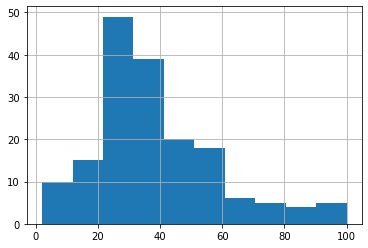

toy_poodle
44.47938144329897
23.957477174543506


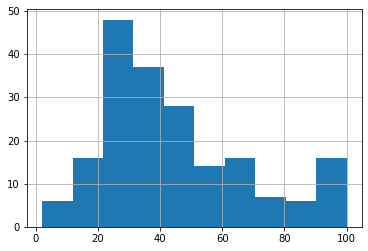

kelpie
37.16317991631799
19.13383162188695


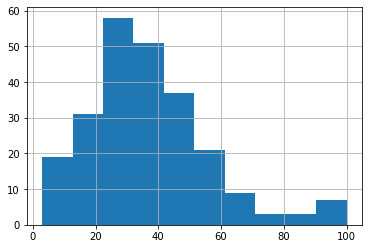

miniature_pinscher
35.671480144404335
16.554598368702905


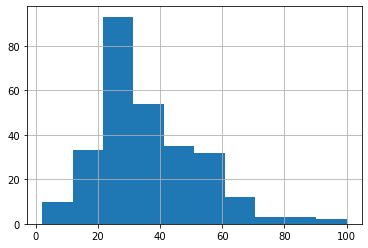

Chihuahua
35.69578313253012
19.082130811397334


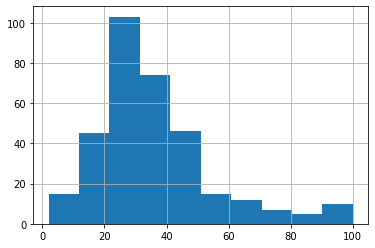

Siamese_cat
32.83136094674556
16.502979460691737


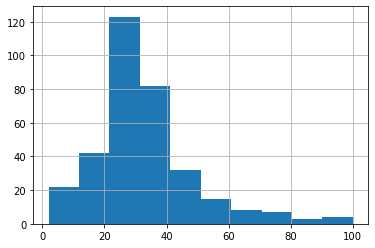

lynx
35.50526315789474
17.280473024534757


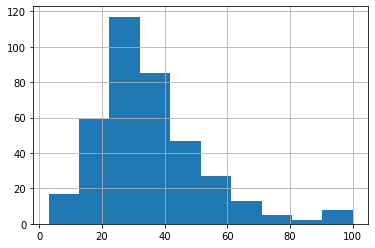

tiger_cat
33.422680412371136
17.03801962187085


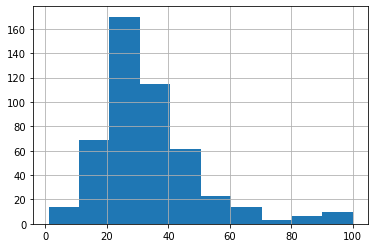

tabby
33.992047713717696
16.620558490123468


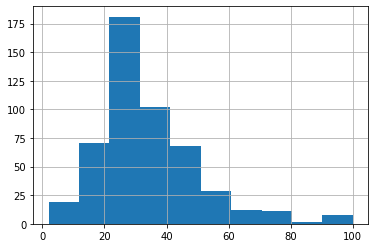

Egyptian_cat
34.86086956521739
17.674607741741273


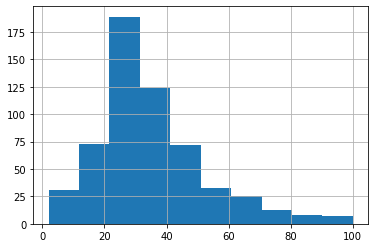

In [358]:
wow_list3 = []

for label in df_im_lost[2].value_counts().sort_values()[-50:].index:
    
    mean = temp['Pawpularity'].mean()
    plt.figure()
    temp = df_im_lost[df_im_lost[2]==label]
    print(label)
    print(temp['Pawpularity'].mean())
    print(temp['Pawpularity'].std())
    temp['Pawpularity'].hist()
    plt.show()
    
    if mean > 45:
        wow_list3.append(label)

Boston_bull
38.170212765957444
17.08841350274223


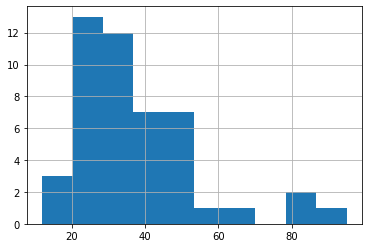

Norwegian_elkhound
40.148936170212764
21.196778593850215


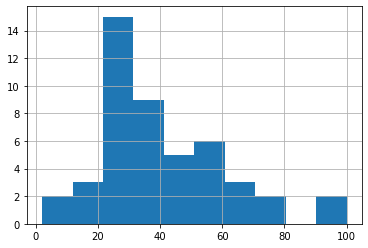

borzoi
41.48
25.07966083811944


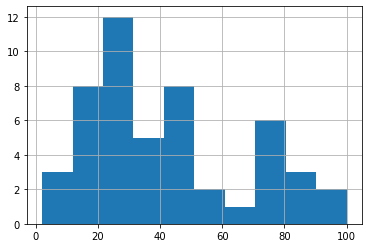

Scotch_terrier
37.22
17.90711863922233


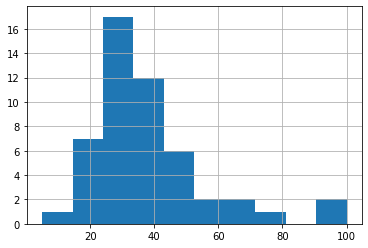

bath_towel
36.666666666666664
19.30250415533349


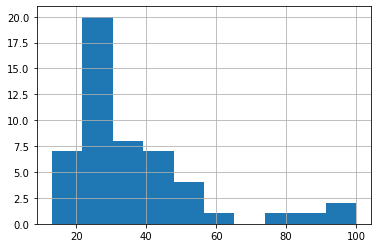

giant_schnauzer
39.05882352941177
21.69093060678207


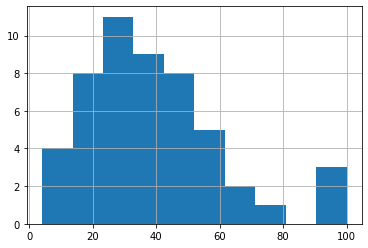

Eskimo_dog
37.23529411764706
23.7988136135347


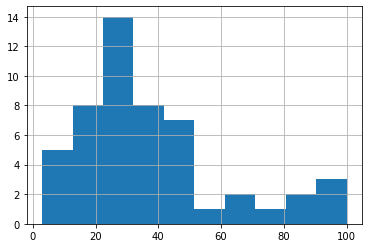

miniature_poodle
43.21568627450981
27.76495181014381


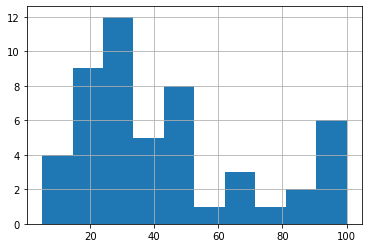

wallaby
33.79245283018868
17.02753255823552


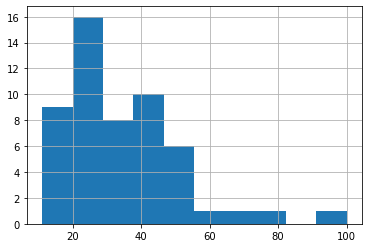

paper_towel
38.4
22.33963426869964


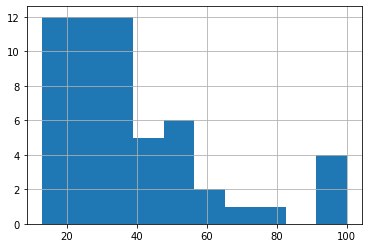

Border_terrier
43.345454545454544
20.235848445013673


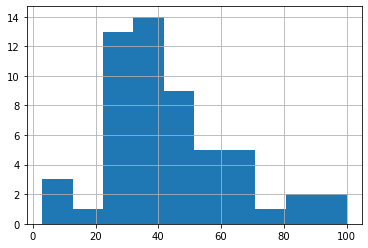

German_short-haired_pointer
37.14545454545455
21.7906012544469


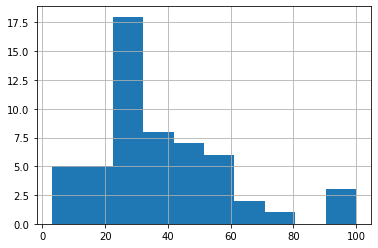

Pomeranian
48.228070175438596
26.88202901027512


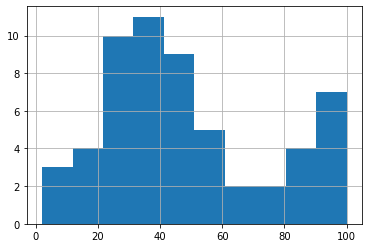

English_setter
40.39655172413793
23.42808305474617


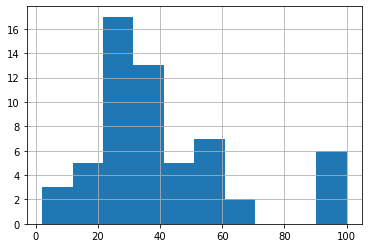

weasel
39.40625
21.82012959529699


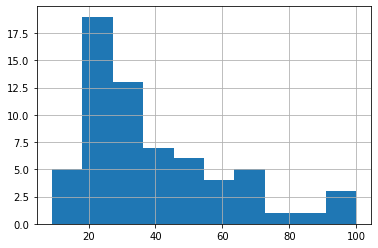

grey_fox
34.134328358208954
15.823740815802653


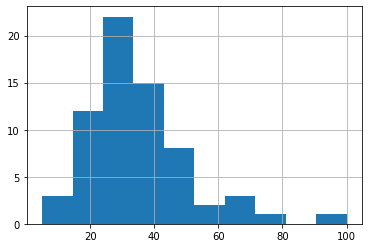

Angora
42.5
24.95895180816532


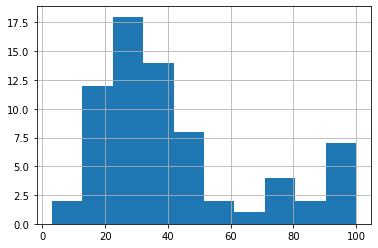

Weimaraner
34.83098591549296
16.936002155588092


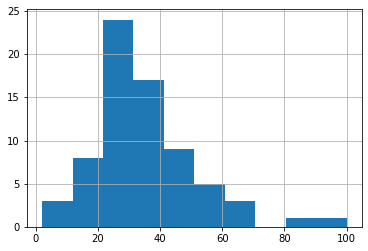

Bedlington_terrier
43.810810810810814
23.984969994455906


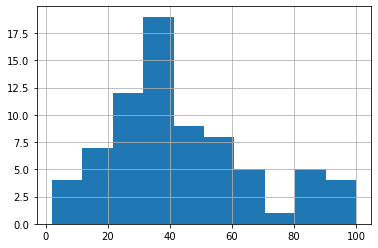

Chesapeake_Bay_retriever
38.666666666666664
19.322059707546483


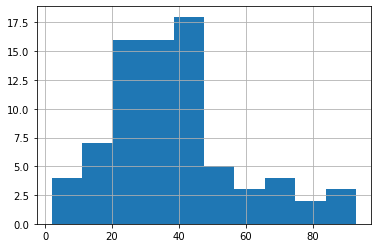

Lakeland_terrier
43.24050632911393
20.938380407742102


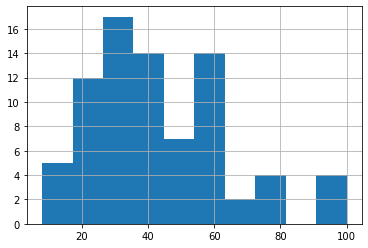

miniature_schnauzer
39.95180722891566
21.53947233906423


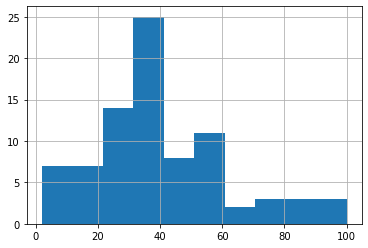

kuvasz
42.01190476190476
25.615081235272623


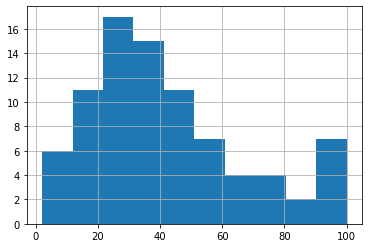

American_Staffordshire_terrier
41.95294117647059
23.517423066209233


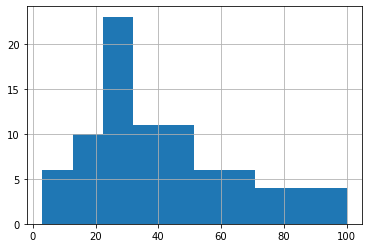

beagle
40.79545454545455
21.27875152488229


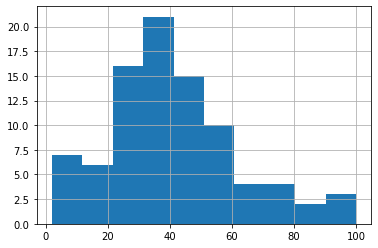

Italian_greyhound
36.86813186813187
17.068625402708125


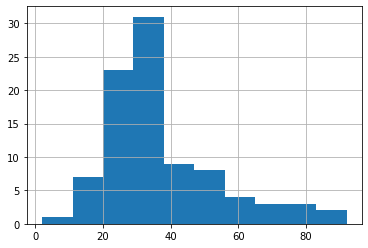

wire-haired_fox_terrier
43.30107526881721
26.085888633277406


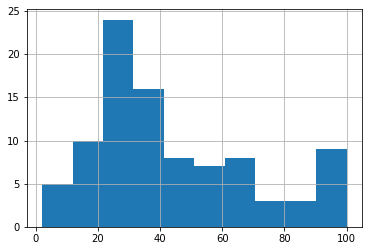

Madagascar_cat
33.2
16.309245517855878


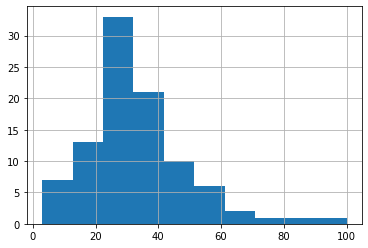

Staffordshire_bullterrier
37.391752577319586
15.085559251752793


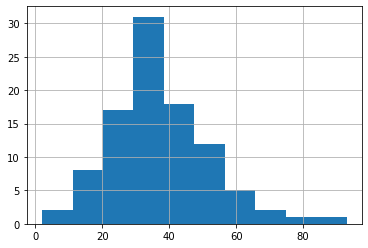

Mexican_hairless
33.9
16.055144869096534


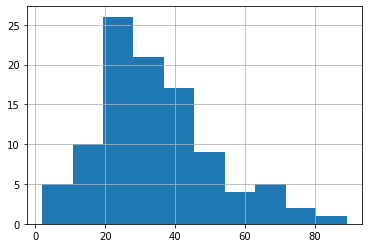

toy_terrier
38.18269230769231
17.943689927522875


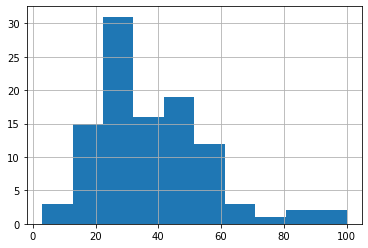

West_Highland_white_terrier
41.18518518518518
23.564644889122192


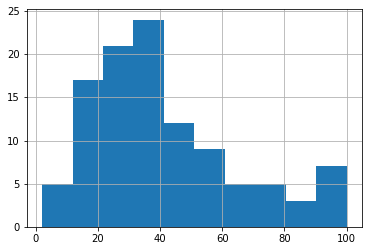

standard_poodle
45.392857142857146
24.602921214842198


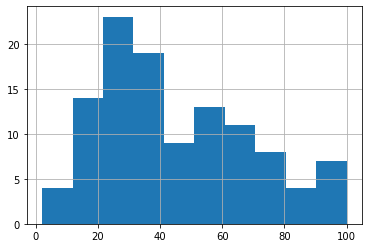

Siberian_husky
37.40163934426229
19.63032728602495


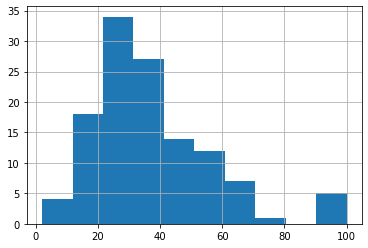

French_bulldog
34.41803278688525
17.00308195881234


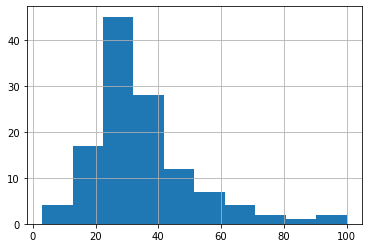

Arctic_fox
37.43089430894309
20.477529188177762


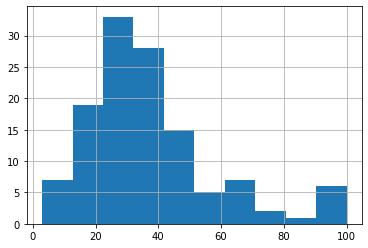

schipperke
40.87786259541985
23.038770967741566


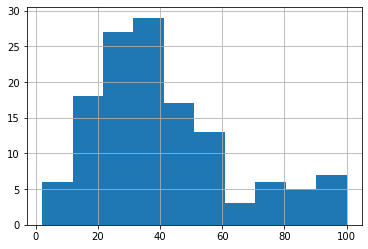

pug
39.48951048951049
22.204829804799235


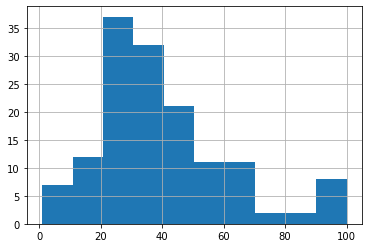

Persian_cat
41.71052631578947
21.22338819189042


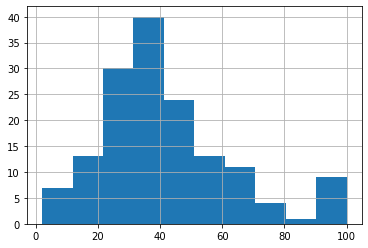

Labrador_retriever
38.81012658227848
19.281076131771314


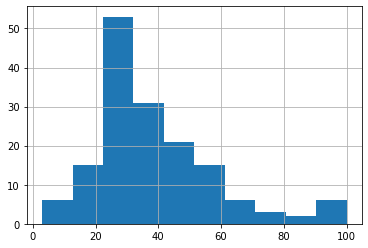

window_screen
34.21468926553672
16.995628082203297


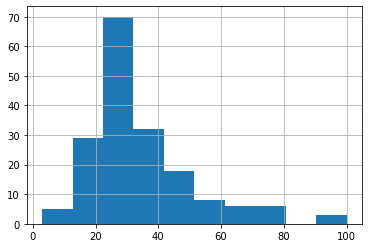

toy_poodle
43.409326424870464
24.36620174677963


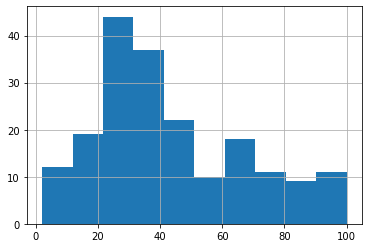

kelpie
34.03414634146341
18.053944354162198


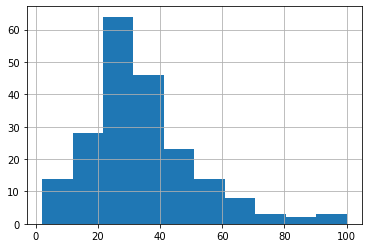

miniature_pinscher
34.345991561181435
16.618555676190407


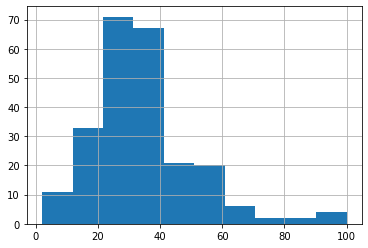

Chihuahua
35.86434108527132
19.05860835129043


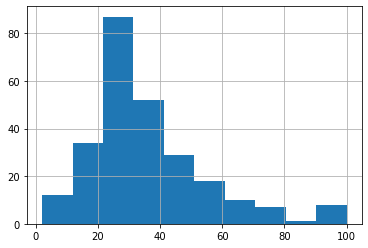

Siamese_cat
33.06024096385542
14.937816240010147


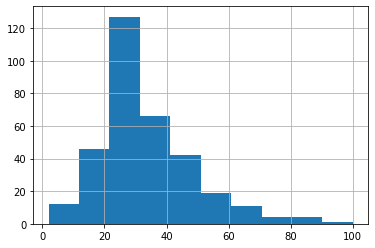

tiger_cat
32.671469740634
15.53632212137264


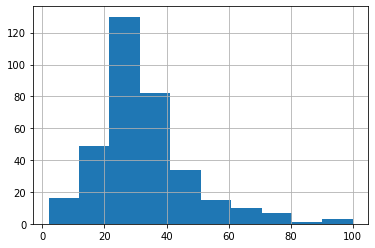

tabby
34.342465753424655
17.777176361780924


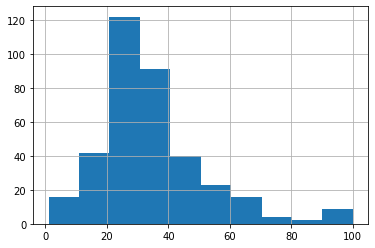

Egyptian_cat
37.62734584450402
19.63026527356967


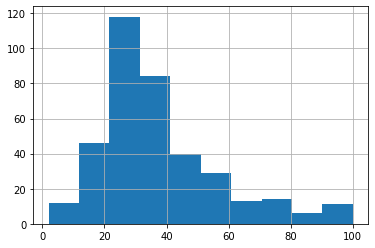

lynx
34.9140625
18.43570404036137


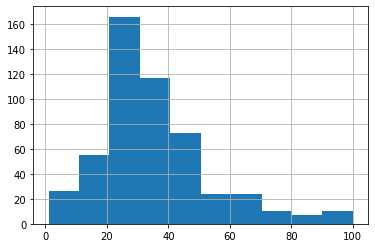

In [359]:
wow_list4 = []

for label in df_im_lost[3].value_counts().sort_values()[-50:].index:
    
    mean = temp['Pawpularity'].mean()
    plt.figure()
    temp = df_im_lost[df_im_lost[3]==label]
    print(label)
    print(temp['Pawpularity'].mean())
    print(temp['Pawpularity'].std())
    temp['Pawpularity'].hist()
    plt.show()
    
    if mean > 45:
        wow_list4.append(label)

doormat
35.113207547169814
21.383549012265057


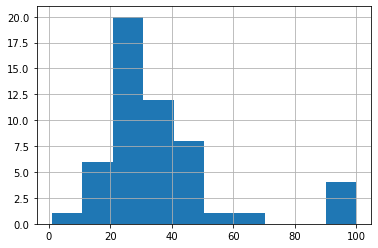

groenendael
47.132075471698116
24.500422081018126


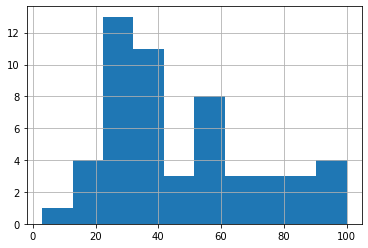

Shih-Tzu
45.39622641509434
27.721374440507585


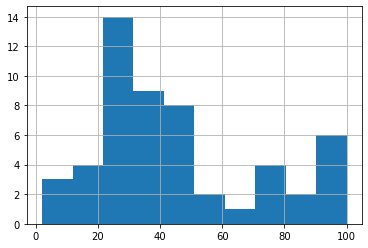

Scotch_terrier
34.2037037037037
19.043524754634145


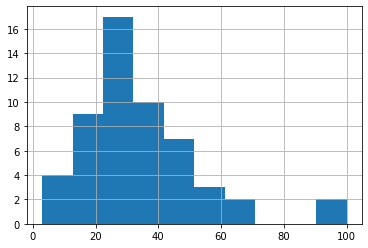

washbasin
35.58181818181818
18.973364282291957


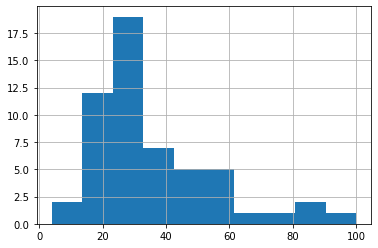

Maltese_dog
50.8421052631579
25.06761533025957


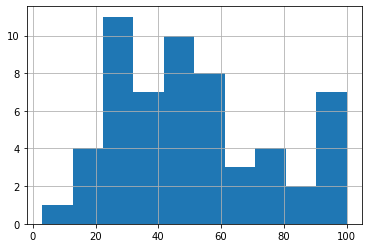

Eskimo_dog
38.327586206896555
22.97549261143386


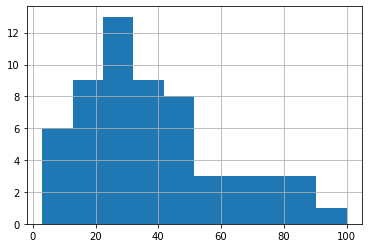

bath_towel
33.389830508474574
18.168765305584145


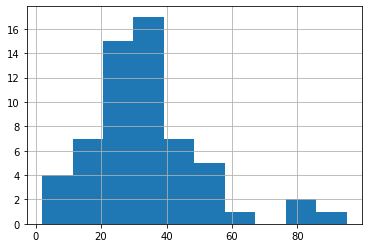

grey_fox
33.52459016393443
17.834055957985786


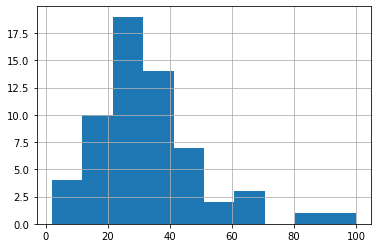

German_short-haired_pointer
37.67741935483871
18.802488668161473


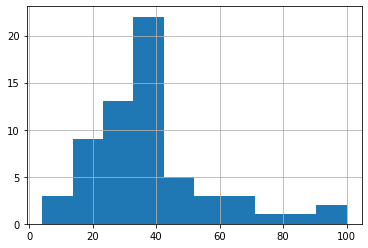

wallaby
31.75
15.907470542094964


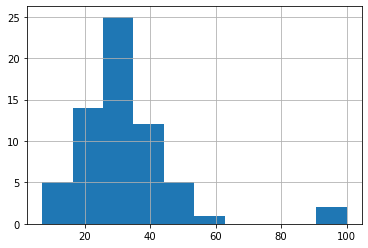

Boston_bull
39.43076923076923
22.27243898771615


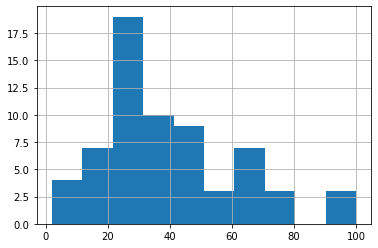

paper_towel
32.87692307692308
15.662961577703475


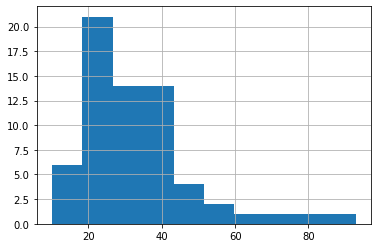

weasel
36.56060606060606
18.8835531108046


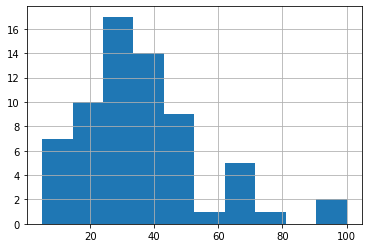

Angora
41.0
23.62391907027295


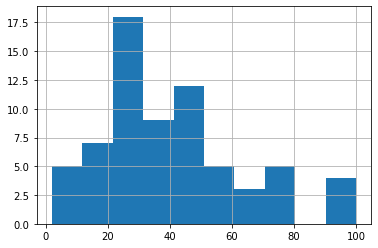

Chesapeake_Bay_retriever
38.14492753623188
17.41388506363177


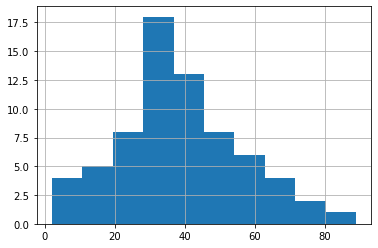

kuvasz
42.48571428571429
19.187664256686617


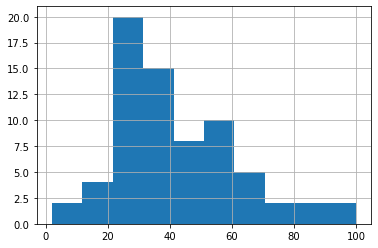

English_setter
41.3
18.94106037464487


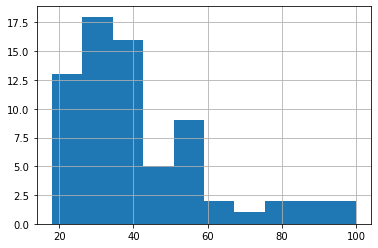

Pomeranian
49.128571428571426
25.190245080287905


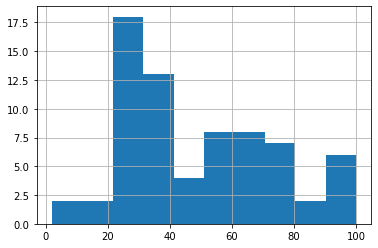

standard_poodle
45.45205479452055
29.15716087758546


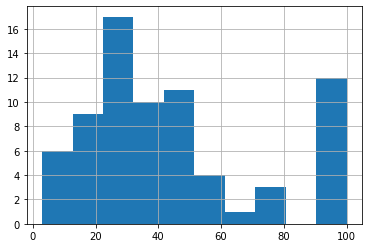

beagle
43.082191780821915
24.56948956229246


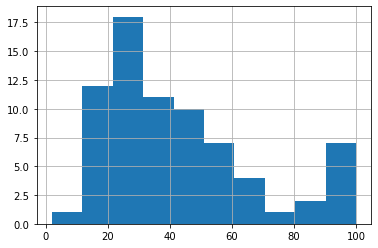

Madagascar_cat
34.29333333333334
15.93040042364465


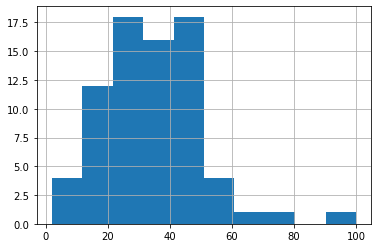

miniature_schnauzer
38.85897435897436
23.937540130636386


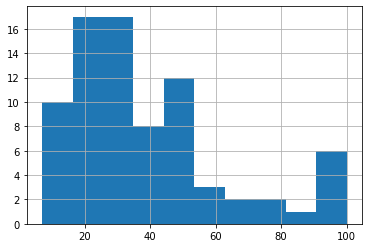

Bedlington_terrier
36.151898734177216
19.36894726471885


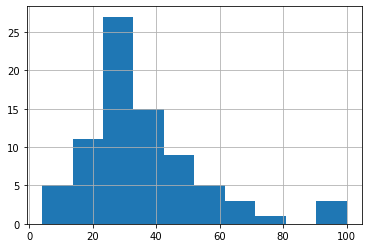

American_Staffordshire_terrier
40.76543209876543
21.261039253137575


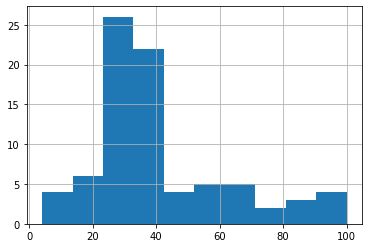

toy_terrier
32.036144578313255
16.327028154844534


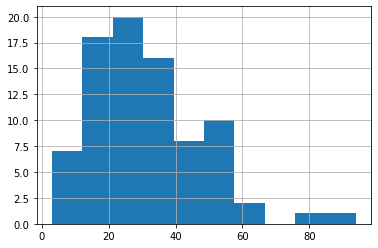

Italian_greyhound
37.258823529411764
18.08521689192616


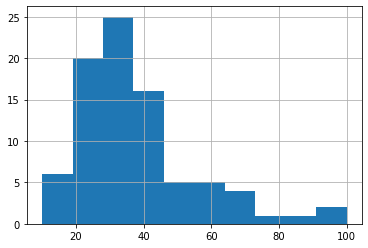

wire-haired_fox_terrier
36.526881720430104
20.385198913325766


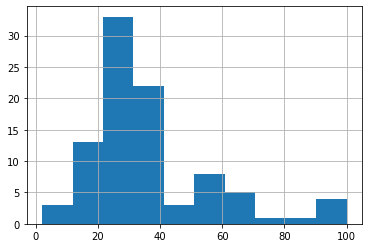

Weimaraner
35.8041237113402
17.425818473877666


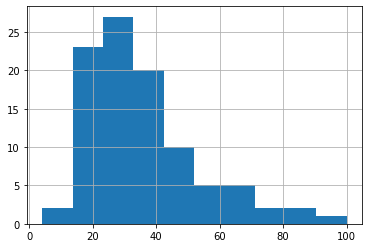

Lakeland_terrier
38.76
23.466339529400212


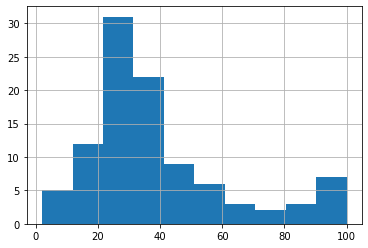

Mexican_hairless
32.663366336633665
14.439028518375306


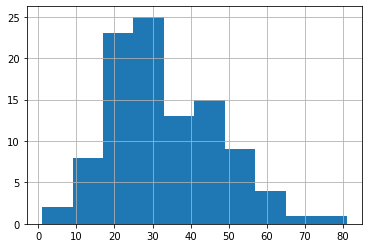

Staffordshire_bullterrier
36.80582524271845
16.57133022245678


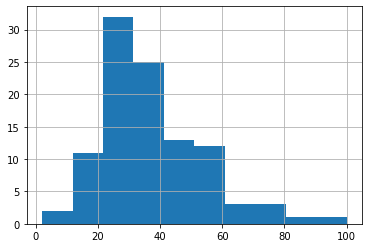

Arctic_fox
38.10280373831776
18.46104239756017


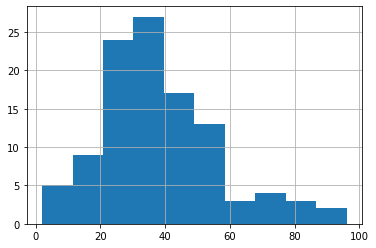

schipperke
35.71028037383178
17.043788967640943


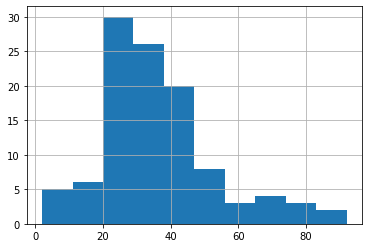

West_Highland_white_terrier
41.345454545454544
21.04274215728347


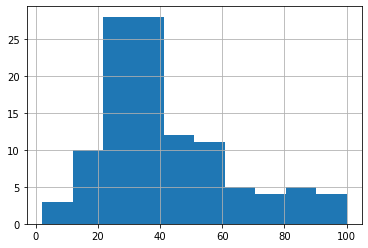

pug
37.84426229508197
19.07229416780254


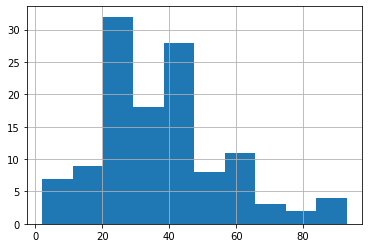

Siberian_husky
37.67716535433071
21.851548886209628


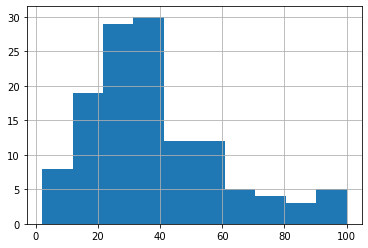

Labrador_retriever
37.49264705882353
18.117720535034778


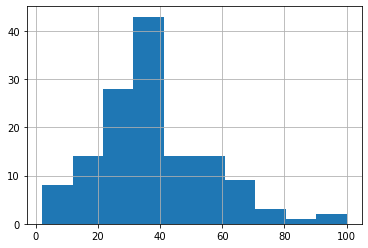

French_bulldog
35.715328467153284
18.637781404002325


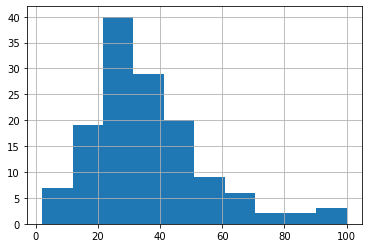

Persian_cat
40.95757575757576
19.835712900784166


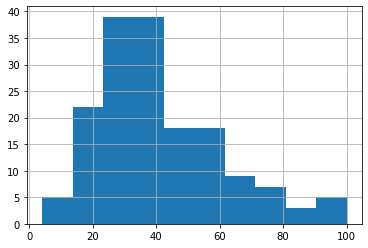

toy_poodle
44.651685393258425
24.934309683712687


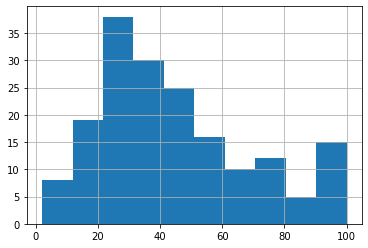

kelpie
38.08465608465608
20.261671905801037


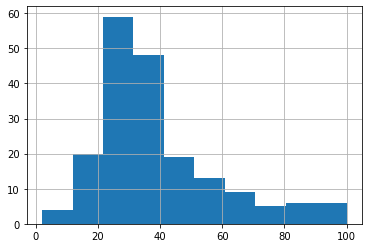

miniature_pinscher
34.267857142857146
17.163148625001618


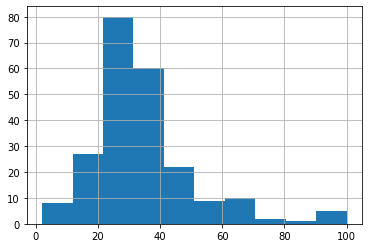

window_screen
34.910204081632656
15.135998844600701


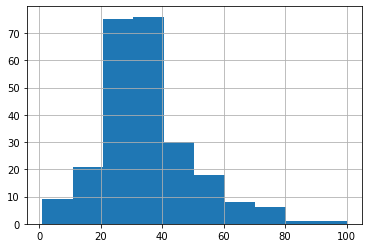

Egyptian_cat
36.976653696498055
19.61204388433321


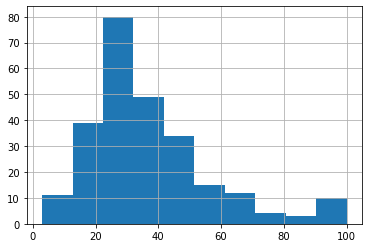

tabby
33.35294117647059
14.440630160614232


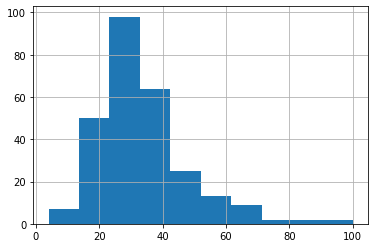

Chihuahua
35.3758865248227
18.458972109695278


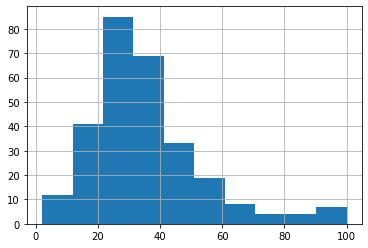

tiger_cat
33.53872053872054
15.905952981489046


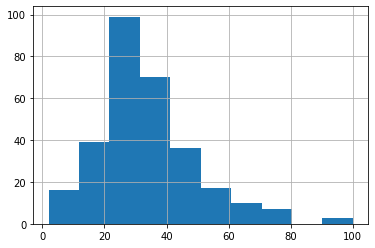

lynx
34.23546511627907
17.956371431937328


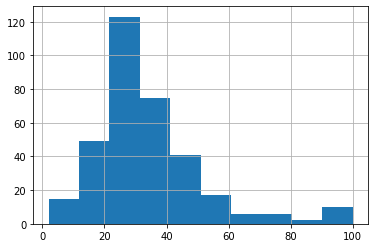

Siamese_cat
34.72086720867209
17.954217843624942


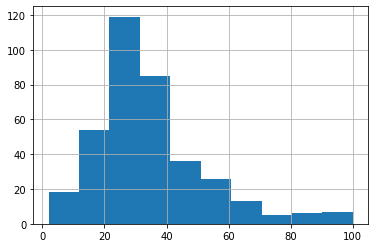

In [360]:
wow_list5 = []

for label in df_im_lost[4].value_counts().sort_values()[-50:].index:
    
    mean = temp['Pawpularity'].mean()
    plt.figure()
    temp = df_im_lost[df_im_lost[4]==label]
    print(label)
    print(temp['Pawpularity'].mean())
    print(temp['Pawpularity'].std())
    temp['Pawpularity'].hist()
    plt.show()
    
    if mean > 45:
        wow_list5.append(label)

In [377]:
set(wow_list1).union(set(wow_list2)).union(set(wow_list3)).union(set(wow_list4)).union(set(wow_list5))

{'English_setter',
 'Eskimo_dog',
 'German_short-haired_pointer',
 'Ibizan_hound',
 'Italian_greyhound',
 'Mexican_hairless',
 'Pomeranian',
 'Samoyed',
 'Scotch_terrier',
 'Shih-Tzu',
 'Siberian_husky',
 'bath_towel',
 'beagle',
 'jigsaw_puzzle',
 'kuvasz',
 'miniature_pinscher',
 'miniature_poodle',
 'miniature_schnauzer',
 'platypus',
 'pug',
 'standard_poodle',
 'triceratops',
 'wallaby',
 'weasel'}

In [124]:
preds = []

for i in range(pred.shape[0]):
    ind = np.argpartition(pred[i,:], -4)[-4:]
#    max_pos = np.argmax(pred[i,:])
    preds.append(ind)

In [98]:
# preds_series = pd.Series(preds, name='is_dog')

In [125]:
preds_df = pd.DataFrame(preds)

In [311]:
preds_df

,0,1,2,3
0,151,153,265,203
1,700,794,421,669
2,182,333,223,261
3,179,296,248,180
4,529,774,700,978
...,...,...,...,...
9907,286,282,281,285
9908,242,209,178,208
9909,287,281,284,285
9910,265,196,151,237


In [312]:
for col in preds_df.columns:
    preds_df[col] = preds_df[col].map(r_dict)

In [314]:
preds_df = preds_df.rename(columns={0:'first', 1:'second',2:'third', 3:'fourth'})

In [316]:
first = preds_df['first']
second = preds_df['second']
third = preds_df['third']
fourth = preds_df['fourth']

In [317]:
first

0                                                                      Chihuahua
1                                                                    paper towel
2                                                                 Border terrier
3                          Staffordshire bullterrier, Staffordshire bull terrier
4                                                          diaper, nappy, napkin
                                          ...                                   
9907    cougar, puma, catamount, mountain lion, painter, panther, Felis concolor
9908                                                                       boxer
9909                                                             lynx, catamount
9910                                                                  toy poodle
9911                                                            golden retriever
Name: first, Length: 9912, dtype: object

In [318]:
first_dums = pd.get_dummies(first, prefix='first_')
second_dums = pd.get_dummies(second, prefix='second_')
third_dums = pd.get_dummies(third, prefix='third_')
fourth_dums = pd.get_dummies(fourth, prefix='fourth_')

In [319]:
insanity = pd.concat([first_dums, second_dums, third_dums, fourth_dums], axis=1)

In [255]:
dog_df = (((preds_df >= 151) & (preds_df <= 268))).astype(int)
cat_df = (((preds_df >= 281) & (preds_df <= 293))).astype(int)
trash_df  = (((preds_df >= 300) | (preds_df <= 150))).astype(int)

In [256]:
dog_df['dog'] = is_dog_df[0] + is_dog_df[1] + is_dog_df[2] + is_dog_df[3]
cat_df['cat'] = is_cat_df[0] + is_cat_df[1] + is_cat_df[2] + is_cat_df[3]
trash_df['trash'] = trash_df[0] + trash_df[1] + trash_df[2] + trash_df[3]

In [257]:
# is_dog_df['dog'] = (is_dog_df['dog'] > 0).astype(int)
# is_cat_df['cat'] = (is_cat_df['cat'] > 0).astype(int)
# trash_df['trash'] = (trash_df['trash'] > 0).astype(int)

In [258]:
another = pd.concat([df, dog_df['dog'], cat_df['cat'], trash_df['trash']], axis=1)
another

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,dog,cat,trash
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63,4,0,0
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42,0,0,4
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28,3,0,1
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15,3,0,0
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15,0,4,0
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70,4,0,0
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20,0,4,0
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20,4,0,0


In [310]:
dog_df

,0,1,2,3,dog
0,1,1,1,1,4
1,0,0,0,0,0
2,1,0,1,1,3
3,1,0,1,1,3
4,0,0,0,0,0
...,...,...,...,...,...
9907,0,0,0,0,0
9908,1,1,1,1,4
9909,0,0,0,0,0
9910,1,1,1,1,4


In [248]:
dogs = another[another['dog']]
cats = another[another['cat']==3]
trash = another[another['trash']==3]

In [250]:
for i in range(5):
    print(another[another['dog']==i]['Pawpularity'].mean())
    print(another[another['cat']==i]['Pawpularity'].mean())
    print(another[another['trash']==i]['Pawpularity'].mean())
    print()

35.158045155758785
40.15603584607275
39.05308092056422

35.87892791127542
36.988718775181304
37.13418079096045

37.723670490093845
34.41353383458647
36.40298507462686

39.07305577376277
34.37122736418511
36.77414330218068

41.7189415940626
34.50995260663507
36.616618075801746



In [291]:
dog_dums = pd.get_dummies(dog_df['dog'], prefix='dog_', drop_first=True)
cat_dums = pd.get_dummies(cat_df['cat'], prefix='cat_', drop_first=True)
trash_dums = pd.get_dummies(trash_df['trash'], prefix='trash_', drop_first=True)

In [292]:
crazy_df = pd.concat([dog_dums, cat_dums, trash_dums], axis=1)

In [293]:
crazy_df

,dog__1,dog__2,dog__3,dog__4,cat__1,cat__2,cat__3,cat__4,trash__1,trash__2,trash__3,trash__4
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9907,0,0,0,0,0,0,0,1,0,0,0,0
9908,0,0,0,1,0,0,0,0,0,0,0,0
9909,0,0,0,0,0,0,0,1,0,0,0,0
9910,0,0,0,1,0,0,0,0,0,0,0,0


<AxesSubplot:>

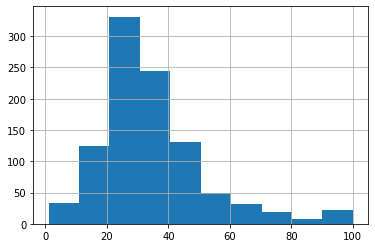

In [294]:
cats['Pawpularity'].hist()

<AxesSubplot:>

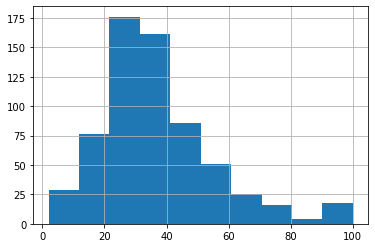

In [295]:
trash['Pawpularity'].hist()

In [296]:
from sklearn.model_selection import train_test_split

In [320]:
X_train, X_test, y_train, y_test = train_test_split(insanity, another['Pawpularity'], random_state=42)

In [321]:
from sklearn.ensemble import RandomForestRegressor

In [322]:
rf = RandomForestRegressor(n_jobs=-1, random_state=42)

rf.fit(X_train, y_train)
p1 = rf.predict(X_test)

In [323]:
from sklearn.metrics import mean_squared_error

In [324]:
mean_squared_error(y_test, p1, squared=False)

21.36472825069877

In [325]:
from sklearn.linear_model import LinearRegression

In [326]:
lr = LinearRegression(n_jobs=-1)

In [327]:
lr.fit(X_train, y_train)
p2 = lr.predict(X_test)

In [328]:
mean_squared_error(y_test, p2, squared=False)

53756295005705.04

In [307]:
r_dict = {0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma maculatum',
 29: 'axolotl, mud puppy, Ambystoma mexicanum',
 30: 'bullfrog, Rana catesbeiana',
 31: 'tree frog, tree-frog',
 32: 'tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui',
 33: 'loggerhead, loggerhead turtle, Caretta caretta',
 34: 'leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea',
 35: 'mud turtle',
 36: 'terrapin',
 37: 'box turtle, box tortoise',
 38: 'banded gecko',
 39: 'common iguana, iguana, Iguana iguana',
 40: 'American chameleon, anole, Anolis carolinensis',
 41: 'whiptail, whiptail lizard',
 42: 'agama',
 43: 'frilled lizard, Chlamydosaurus kingi',
 44: 'alligator lizard',
 45: 'Gila monster, Heloderma suspectum',
 46: 'green lizard, Lacerta viridis',
 47: 'African chameleon, Chamaeleo chamaeleon',
 48: 'Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis',
 49: 'African crocodile, Nile crocodile, Crocodylus niloticus',
 50: 'American alligator, Alligator mississipiensis',
 51: 'triceratops',
 52: 'thunder snake, worm snake, Carphophis amoenus',
 53: 'ringneck snake, ring-necked snake, ring snake',
 54: 'hognose snake, puff adder, sand viper',
 55: 'green snake, grass snake',
 56: 'king snake, kingsnake',
 57: 'garter snake, grass snake',
 58: 'water snake',
 59: 'vine snake',
 60: 'night snake, Hypsiglena torquata',
 61: 'boa constrictor, Constrictor constrictor',
 62: 'rock python, rock snake, Python sebae',
 63: 'Indian cobra, Naja naja',
 64: 'green mamba',
 65: 'sea snake',
 66: 'horned viper, cerastes, sand viper, horned asp, Cerastes cornutus',
 67: 'diamondback, diamondback rattlesnake, Crotalus adamanteus',
 68: 'sidewinder, horned rattlesnake, Crotalus cerastes',
 69: 'trilobite',
 70: 'harvestman, daddy longlegs, Phalangium opilio',
 71: 'scorpion',
 72: 'black and gold garden spider, Argiope aurantia',
 73: 'barn spider, Araneus cavaticus',
 74: 'garden spider, Aranea diademata',
 75: 'black widow, Latrodectus mactans',
 76: 'tarantula',
 77: 'wolf spider, hunting spider',
 78: 'tick',
 79: 'centipede',
 80: 'black grouse',
 81: 'ptarmigan',
 82: 'ruffed grouse, partridge, Bonasa umbellus',
 83: 'prairie chicken, prairie grouse, prairie fowl',
 84: 'peacock',
 85: 'quail',
 86: 'partridge',
 87: 'African grey, African gray, Psittacus erithacus',
 88: 'macaw',
 89: 'sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita',
 90: 'lorikeet',
 91: 'coucal',
 92: 'bee eater',
 93: 'hornbill',
 94: 'hummingbird',
 95: 'jacamar',
 96: 'toucan',
 97: 'drake',
 98: 'red-breasted merganser, Mergus serrator',
 99: 'goose',
 100: 'black swan, Cygnus atratus',
 101: 'tusker',
 102: 'echidna, spiny anteater, anteater',
 103: 'platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus',
 104: 'wallaby, brush kangaroo',
 105: 'koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus',
 106: 'wombat',
 107: 'jellyfish',
 108: 'sea anemone, anemone',
 109: 'brain coral',
 110: 'flatworm, platyhelminth',
 111: 'nematode, nematode worm, roundworm',
 112: 'conch',
 113: 'snail',
 114: 'slug',
 115: 'sea slug, nudibranch',
 116: 'chiton, coat-of-mail shell, sea cradle, polyplacophore',
 117: 'chambered nautilus, pearly nautilus, nautilus',
 118: 'Dungeness crab, Cancer magister',
 119: 'rock crab, Cancer irroratus',
 120: 'fiddler crab',
 121: 'king crab, Alaska crab, Alaskan king crab, Alaska king crab, Paralithodes camtschatica',
 122: 'American lobster, Northern lobster, Maine lobster, Homarus americanus',
 123: 'spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish',
 124: 'crayfish, crawfish, crawdad, crawdaddy',
 125: 'hermit crab',
 126: 'isopod',
 127: 'white stork, Ciconia ciconia',
 128: 'black stork, Ciconia nigra',
 129: 'spoonbill',
 130: 'flamingo',
 131: 'little blue heron, Egretta caerulea',
 132: 'American egret, great white heron, Egretta albus',
 133: 'bittern',
 134: 'crane',
 135: 'limpkin, Aramus pictus',
 136: 'European gallinule, Porphyrio porphyrio',
 137: 'American coot, marsh hen, mud hen, water hen, Fulica americana',
 138: 'bustard',
 139: 'ruddy turnstone, Arenaria interpres',
 140: 'red-backed sandpiper, dunlin, Erolia alpina',
 141: 'redshank, Tringa totanus',
 142: 'dowitcher',
 143: 'oystercatcher, oyster catcher',
 144: 'pelican',
 145: 'king penguin, Aptenodytes patagonica',
 146: 'albatross, mollymawk',
 147: 'grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus',
 148: 'killer whale, killer, orca, grampus, sea wolf, Orcinus orca',
 149: 'dugong, Dugong dugon',
 150: 'sea lion',
 151: 'Chihuahua',
 152: 'Japanese spaniel',
 153: 'Maltese dog, Maltese terrier, Maltese',
 154: 'Pekinese, Pekingese, Peke',
 155: 'Shih-Tzu',
 156: 'Blenheim spaniel',
 157: 'papillon',
 158: 'toy terrier',
 159: 'Rhodesian ridgeback',
 160: 'Afghan hound, Afghan',
 161: 'basset, basset hound',
 162: 'beagle',
 163: 'bloodhound, sleuthhound',
 164: 'bluetick',
 165: 'black-and-tan coonhound',
 166: 'Walker hound, Walker foxhound',
 167: 'English foxhound',
 168: 'redbone',
 169: 'borzoi, Russian wolfhound',
 170: 'Irish wolfhound',
 171: 'Italian greyhound',
 172: 'whippet',
 173: 'Ibizan hound, Ibizan Podenco',
 174: 'Norwegian elkhound, elkhound',
 175: 'otterhound, otter hound',
 176: 'Saluki, gazelle hound',
 177: 'Scottish deerhound, deerhound',
 178: 'Weimaraner',
 179: 'Staffordshire bullterrier, Staffordshire bull terrier',
 180: 'American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier',
 181: 'Bedlington terrier',
 182: 'Border terrier',
 183: 'Kerry blue terrier',
 184: 'Irish terrier',
 185: 'Norfolk terrier',
 186: 'Norwich terrier',
 187: 'Yorkshire terrier',
 188: 'wire-haired fox terrier',
 189: 'Lakeland terrier',
 190: 'Sealyham terrier, Sealyham',
 191: 'Airedale, Airedale terrier',
 192: 'cairn, cairn terrier',
 193: 'Australian terrier',
 194: 'Dandie Dinmont, Dandie Dinmont terrier',
 195: 'Boston bull, Boston terrier',
 196: 'miniature schnauzer',
 197: 'giant schnauzer',
 198: 'standard schnauzer',
 199: 'Scotch terrier, Scottish terrier, Scottie',
 200: 'Tibetan terrier, chrysanthemum dog',
 201: 'silky terrier, Sydney silky',
 202: 'soft-coated wheaten terrier',
 203: 'West Highland white terrier',
 204: 'Lhasa, Lhasa apso',
 205: 'flat-coated retriever',
 206: 'curly-coated retriever',
 207: 'golden retriever',
 208: 'Labrador retriever',
 209: 'Chesapeake Bay retriever',
 210: 'German short-haired pointer',
 211: 'vizsla, Hungarian pointer',
 212: 'English setter',
 213: 'Irish setter, red setter',
 214: 'Gordon setter',
 215: 'Brittany spaniel',
 216: 'clumber, clumber spaniel',
 217: 'English springer, English springer spaniel',
 218: 'Welsh springer spaniel',
 219: 'cocker spaniel, English cocker spaniel, cocker',
 220: 'Sussex spaniel',
 221: 'Irish water spaniel',
 222: 'kuvasz',
 223: 'schipperke',
 224: 'groenendael',
 225: 'malinois',
 226: 'briard',
 227: 'kelpie',
 228: 'komondor',
 229: 'Old English sheepdog, bobtail',
 230: 'Shetland sheepdog, Shetland sheep dog, Shetland',
 231: 'collie',
 232: 'Border collie',
 233: 'Bouvier des Flandres, Bouviers des Flandres',
 234: 'Rottweiler',
 235: 'German shepherd, German shepherd dog, German police dog, alsatian',
 236: 'Doberman, Doberman pinscher',
 237: 'miniature pinscher',
 238: 'Greater Swiss Mountain dog',
 239: 'Bernese mountain dog',
 240: 'Appenzeller',
 241: 'EntleBucher',
 242: 'boxer',
 243: 'bull mastiff',
 244: 'Tibetan mastiff',
 245: 'French bulldog',
 246: 'Great Dane',
 247: 'Saint Bernard, St Bernard',
 248: 'Eskimo dog, husky',
 249: 'malamute, malemute, Alaskan malamute',
 250: 'Siberian husky',
 251: 'dalmatian, coach dog, carriage dog',
 252: 'affenpinscher, monkey pinscher, monkey dog',
 253: 'basenji',
 254: 'pug, pug-dog',
 255: 'Leonberg',
 256: 'Newfoundland, Newfoundland dog',
 257: 'Great Pyrenees',
 258: 'Samoyed, Samoyede',
 259: 'Pomeranian',
 260: 'chow, chow chow',
 261: 'keeshond',
 262: 'Brabancon griffon',
 263: 'Pembroke, Pembroke Welsh corgi',
 264: 'Cardigan, Cardigan Welsh corgi',
 265: 'toy poodle',
 266: 'miniature poodle',
 267: 'standard poodle',
 268: 'Mexican hairless',
 269: 'timber wolf, grey wolf, gray wolf, Canis lupus',
 270: 'white wolf, Arctic wolf, Canis lupus tundrarum',
 271: 'red wolf, maned wolf, Canis rufus, Canis niger',
 272: 'coyote, prairie wolf, brush wolf, Canis latrans',
 273: 'dingo, warrigal, warragal, Canis dingo',
 274: 'dhole, Cuon alpinus',
 275: 'African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus',
 276: 'hyena, hyaena',
 277: 'red fox, Vulpes vulpes',
 278: 'kit fox, Vulpes macrotis',
 279: 'Arctic fox, white fox, Alopex lagopus',
 280: 'grey fox, gray fox, Urocyon cinereoargenteus',
 281: 'tabby, tabby cat',
 282: 'tiger cat',
 283: 'Persian cat',
 284: 'Siamese cat, Siamese',
 285: 'Egyptian cat',
 286: 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor',
 287: 'lynx, catamount',
 288: 'leopard, Panthera pardus',
 289: 'snow leopard, ounce, Panthera uncia',
 290: 'jaguar, panther, Panthera onca, Felis onca',
 291: 'lion, king of beasts, Panthera leo',
 292: 'tiger, Panthera tigris',
 293: 'cheetah, chetah, Acinonyx jubatus',
 294: 'brown bear, bruin, Ursus arctos',
 295: 'American black bear, black bear, Ursus americanus, Euarctos americanus',
 296: 'ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus',
 297: 'sloth bear, Melursus ursinus, Ursus ursinus',
 298: 'mongoose',
 299: 'meerkat, mierkat',
 300: 'tiger beetle',
 301: 'ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle',
 302: 'ground beetle, carabid beetle',
 303: 'long-horned beetle, longicorn, longicorn beetle',
 304: 'leaf beetle, chrysomelid',
 305: 'dung beetle',
 306: 'rhinoceros beetle',
 307: 'weevil',
 308: 'fly',
 309: 'bee',
 310: 'ant, emmet, pismire',
 311: 'grasshopper, hopper',
 312: 'cricket',
 313: 'walking stick, walkingstick, stick insect',
 314: 'cockroach, roach',
 315: 'mantis, mantid',
 316: 'cicada, cicala',
 317: 'leafhopper',
 318: 'lacewing, lacewing fly',
 319: "dragonfly, darning needle, devil's darning needle, sewing needle, snake feeder, snake doctor, mosquito hawk, skeeter hawk",
 320: 'damselfly',
 321: 'admiral',
 322: 'ringlet, ringlet butterfly',
 323: 'monarch, monarch butterfly, milkweed butterfly, Danaus plexippus',
 324: 'cabbage butterfly',
 325: 'sulphur butterfly, sulfur butterfly',
 326: 'lycaenid, lycaenid butterfly',
 327: 'starfish, sea star',
 328: 'sea urchin',
 329: 'sea cucumber, holothurian',
 330: 'wood rabbit, cottontail, cottontail rabbit',
 331: 'hare',
 332: 'Angora, Angora rabbit',
 333: 'hamster',
 334: 'porcupine, hedgehog',
 335: 'fox squirrel, eastern fox squirrel, Sciurus niger',
 336: 'marmot',
 337: 'beaver',
 338: 'guinea pig, Cavia cobaya',
 339: 'sorrel',
 340: 'zebra',
 341: 'hog, pig, grunter, squealer, Sus scrofa',
 342: 'wild boar, boar, Sus scrofa',
 343: 'warthog',
 344: 'hippopotamus, hippo, river horse, Hippopotamus amphibius',
 345: 'ox',
 346: 'water buffalo, water ox, Asiatic buffalo, Bubalus bubalis',
 347: 'bison',
 348: 'ram, tup',
 349: 'bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain sheep, Ovis canadensis',
 350: 'ibex, Capra ibex',
 351: 'hartebeest',
 352: 'impala, Aepyceros melampus',
 353: 'gazelle',
 354: 'Arabian camel, dromedary, Camelus dromedarius',
 355: 'llama',
 356: 'weasel',
 357: 'mink',
 358: 'polecat, fitch, foulmart, foumart, Mustela putorius',
 359: 'black-footed ferret, ferret, Mustela nigripes',
 360: 'otter',
 361: 'skunk, polecat, wood pussy',
 362: 'badger',
 363: 'armadillo',
 364: 'three-toed sloth, ai, Bradypus tridactylus',
 365: 'orangutan, orang, orangutang, Pongo pygmaeus',
 366: 'gorilla, Gorilla gorilla',
 367: 'chimpanzee, chimp, Pan troglodytes',
 368: 'gibbon, Hylobates lar',
 369: 'siamang, Hylobates syndactylus, Symphalangus syndactylus',
 370: 'guenon, guenon monkey',
 371: 'patas, hussar monkey, Erythrocebus patas',
 372: 'baboon',
 373: 'macaque',
 374: 'langur',
 375: 'colobus, colobus monkey',
 376: 'proboscis monkey, Nasalis larvatus',
 377: 'marmoset',
 378: 'capuchin, ringtail, Cebus capucinus',
 379: 'howler monkey, howler',
 380: 'titi, titi monkey',
 381: 'spider monkey, Ateles geoffroyi',
 382: 'squirrel monkey, Saimiri sciureus',
 383: 'Madagascar cat, ring-tailed lemur, Lemur catta',
 384: 'indri, indris, Indri indri, Indri brevicaudatus',
 385: 'Indian elephant, Elephas maximus',
 386: 'African elephant, Loxodonta africana',
 387: 'lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens',
 388: 'giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca',
 389: 'barracouta, snoek',
 390: 'eel',
 391: 'coho, cohoe, coho salmon, blue jack, silver salmon, Oncorhynchus kisutch',
 392: 'rock beauty, Holocanthus tricolor',
 393: 'anemone fish',
 394: 'sturgeon',
 395: 'gar, garfish, garpike, billfish, Lepisosteus osseus',
 396: 'lionfish',
 397: 'puffer, pufferfish, blowfish, globefish',
 398: 'abacus',
 399: 'abaya',
 400: "academic gown, academic robe, judge's robe",
 401: 'accordion, piano accordion, squeeze box',
 402: 'acoustic guitar',
 403: 'aircraft carrier, carrier, flattop, attack aircraft carrier',
 404: 'airliner',
 405: 'airship, dirigible',
 406: 'altar',
 407: 'ambulance',
 408: 'amphibian, amphibious vehicle',
 409: 'analog clock',
 410: 'apiary, bee house',
 411: 'apron',
 412: 'ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin',
 413: 'assault rifle, assault gun',
 414: 'backpack, back pack, knapsack, packsack, rucksack, haversack',
 415: 'bakery, bakeshop, bakehouse',
 416: 'balance beam, beam',
 417: 'balloon',
 418: 'ballpoint, ballpoint pen, ballpen, Biro',
 419: 'Band Aid',
 420: 'banjo',
 421: 'bannister, banister, balustrade, balusters, handrail',
 422: 'barbell',
 423: 'barber chair',
 424: 'barbershop',
 425: 'barn',
 426: 'barometer',
 427: 'barrel, cask',
 428: 'barrow, garden cart, lawn cart, wheelbarrow',
 429: 'baseball',
 430: 'basketball',
 431: 'bassinet',
 432: 'bassoon',
 433: 'bathing cap, swimming cap',
 434: 'bath towel',
 435: 'bathtub, bathing tub, bath, tub',
 436: 'beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon',
 437: 'beacon, lighthouse, beacon light, pharos',
 438: 'beaker',
 439: 'bearskin, busby, shako',
 440: 'beer bottle',
 441: 'beer glass',
 442: 'bell cote, bell cot',
 443: 'bib',
 444: 'bicycle-built-for-two, tandem bicycle, tandem',
 445: 'bikini, two-piece',
 446: 'binder, ring-binder',
 447: 'binoculars, field glasses, opera glasses',
 448: 'birdhouse',
 449: 'boathouse',
 450: 'bobsled, bobsleigh, bob',
 451: 'bolo tie, bolo, bola tie, bola',
 452: 'bonnet, poke bonnet',
 453: 'bookcase',
 454: 'bookshop, bookstore, bookstall',
 455: 'bottlecap',
 456: 'bow',
 457: 'bow tie, bow-tie, bowtie',
 458: 'brass, memorial tablet, plaque',
 459: 'brassiere, bra, bandeau',
 460: 'breakwater, groin, groyne, mole, bulwark, seawall, jetty',
 461: 'breastplate, aegis, egis',
 462: 'broom',
 463: 'bucket, pail',
 464: 'buckle',
 465: 'bulletproof vest',
 466: 'bullet train, bullet',
 467: 'butcher shop, meat market',
 468: 'cab, hack, taxi, taxicab',
 469: 'caldron, cauldron',
 470: 'candle, taper, wax light',
 471: 'cannon',
 472: 'canoe',
 473: 'can opener, tin opener',
 474: 'cardigan',
 475: 'car mirror',
 476: 'carousel, carrousel, merry-go-round, roundabout, whirligig',
 477: "carpenter's kit, tool kit",
 478: 'carton',
 479: 'car wheel',
 480: 'cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM',
 481: 'cassette',
 482: 'cassette player',
 483: 'castle',
 484: 'catamaran',
 485: 'CD player',
 486: 'cello, violoncello',
 487: 'cellular telephone, cellular phone, cellphone, cell, mobile phone',
 488: 'chain',
 489: 'chainlink fence',
 490: 'chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour',
 491: 'chain saw, chainsaw',
 492: 'chest',
 493: 'chiffonier, commode',
 494: 'chime, bell, gong',
 495: 'china cabinet, china closet',
 496: 'Christmas stocking',
 497: 'church, church building',
 498: 'cinema, movie theater, movie theatre, movie house, picture palace',
 499: 'cleaver, meat cleaver, chopper',
 500: 'cliff dwelling',
 501: 'cloak',
 502: 'clog, geta, patten, sabot',
 503: 'cocktail shaker',
 504: 'coffee mug',
 505: 'coffeepot',
 506: 'coil, spiral, volute, whorl, helix',
 507: 'combination lock',
 508: 'computer keyboard, keypad',
 509: 'confectionery, confectionary, candy store',
 510: 'container ship, containership, container vessel',
 511: 'convertible',
 512: 'corkscrew, bottle screw',
 513: 'cornet, horn, trumpet, trump',
 514: 'cowboy boot',
 515: 'cowboy hat, ten-gallon hat',
 516: 'cradle',
 517: 'crane',
 518: 'crash helmet',
 519: 'crate',
 520: 'crib, cot',
 521: 'Crock Pot',
 522: 'croquet ball',
 523: 'crutch',
 524: 'cuirass',
 525: 'dam, dike, dyke',
 526: 'desk',
 527: 'desktop computer',
 528: 'dial telephone, dial phone',
 529: 'diaper, nappy, napkin',
 530: 'digital clock',
 531: 'digital watch',
 532: 'dining table, board',
 533: 'dishrag, dishcloth',
 534: 'dishwasher, dish washer, dishwashing machine',
 535: 'disk brake, disc brake',
 536: 'dock, dockage, docking facility',
 537: 'dogsled, dog sled, dog sleigh',
 538: 'dome',
 539: 'doormat, welcome mat',
 540: 'drilling platform, offshore rig',
 541: 'drum, membranophone, tympan',
 542: 'drumstick',
 543: 'dumbbell',
 544: 'Dutch oven',
 545: 'electric fan, blower',
 546: 'electric guitar',
 547: 'electric locomotive',
 548: 'entertainment center',
 549: 'envelope',
 550: 'espresso maker',
 551: 'face powder',
 552: 'feather boa, boa',
 553: 'file, file cabinet, filing cabinet',
 554: 'fireboat',
 555: 'fire engine, fire truck',
 556: 'fire screen, fireguard',
 557: 'flagpole, flagstaff',
 558: 'flute, transverse flute',
 559: 'folding chair',
 560: 'football helmet',
 561: 'forklift',
 562: 'fountain',
 563: 'fountain pen',
 564: 'four-poster',
 565: 'freight car',
 566: 'French horn, horn',
 567: 'frying pan, frypan, skillet',
 568: 'fur coat',
 569: 'garbage truck, dustcart',
 570: 'gasmask, respirator, gas helmet',
 571: 'gas pump, gasoline pump, petrol pump, island dispenser',
 572: 'goblet',
 573: 'go-kart',
 574: 'golf ball',
 575: 'golfcart, golf cart',
 576: 'gondola',
 577: 'gong, tam-tam',
 578: 'gown',
 579: 'grand piano, grand',
 580: 'greenhouse, nursery, glasshouse',
 581: 'grille, radiator grille',
 582: 'grocery store, grocery, food market, market',
 583: 'guillotine',
 584: 'hair slide',
 585: 'hair spray',
 586: 'half track',
 587: 'hammer',
 588: 'hamper',
 589: 'hand blower, blow dryer, blow drier, hair dryer, hair drier',
 590: 'hand-held computer, hand-held microcomputer',
 591: 'handkerchief, hankie, hanky, hankey',
 592: 'hard disc, hard disk, fixed disk',
 593: 'harmonica, mouth organ, harp, mouth harp',
 594: 'harp',
 595: 'harvester, reaper',
 596: 'hatchet',
 597: 'holster',
 598: 'home theater, home theatre',
 599: 'honeycomb',
 600: 'hook, claw',
 601: 'hoopskirt, crinoline',
 602: 'horizontal bar, high bar',
 603: 'horse cart, horse-cart',
 604: 'hourglass',
 605: 'iPod',
 606: 'iron, smoothing iron',
 607: "jack-o'-lantern",
 608: 'jean, blue jean, denim',
 609: 'jeep, landrover',
 610: 'jersey, T-shirt, tee shirt',
 611: 'jigsaw puzzle',
 612: 'jinrikisha, ricksha, rickshaw',
 613: 'joystick',
 614: 'kimono',
 615: 'knee pad',
 616: 'knot',
 617: 'lab coat, laboratory coat',
 618: 'ladle',
 619: 'lampshade, lamp shade',
 620: 'laptop, laptop computer',
 621: 'lawn mower, mower',
 622: 'lens cap, lens cover',
 623: 'letter opener, paper knife, paperknife',
 624: 'library',
 625: 'lifeboat',
 626: 'lighter, light, igniter, ignitor',
 627: 'limousine, limo',
 628: 'liner, ocean liner',
 629: 'lipstick, lip rouge',
 630: 'Loafer',
 631: 'lotion',
 632: 'loudspeaker, speaker, speaker unit, loudspeaker system, speaker system',
 633: "loupe, jeweler's loupe",
 634: 'lumbermill, sawmill',
 635: 'magnetic compass',
 636: 'mailbag, postbag',
 637: 'mailbox, letter box',
 638: 'maillot',
 639: 'maillot, tank suit',
 640: 'manhole cover',
 641: 'maraca',
 642: 'marimba, xylophone',
 643: 'mask',
 644: 'matchstick',
 645: 'maypole',
 646: 'maze, labyrinth',
 647: 'measuring cup',
 648: 'medicine chest, medicine cabinet',
 649: 'megalith, megalithic structure',
 650: 'microphone, mike',
 651: 'microwave, microwave oven',
 652: 'military uniform',
 653: 'milk can',
 654: 'minibus',
 655: 'miniskirt, mini',
 656: 'minivan',
 657: 'missile',
 658: 'mitten',
 659: 'mixing bowl',
 660: 'mobile home, manufactured home',
 661: 'Model T',
 662: 'modem',
 663: 'monastery',
 664: 'monitor',
 665: 'moped',
 666: 'mortar',
 667: 'mortarboard',
 668: 'mosque',
 669: 'mosquito net',
 670: 'motor scooter, scooter',
 671: 'mountain bike, all-terrain bike, off-roader',
 672: 'mountain tent',
 673: 'mouse, computer mouse',
 674: 'mousetrap',
 675: 'moving van',
 676: 'muzzle',
 677: 'nail',
 678: 'neck brace',
 679: 'necklace',
 680: 'nipple',
 681: 'notebook, notebook computer',
 682: 'obelisk',
 683: 'oboe, hautboy, hautbois',
 684: 'ocarina, sweet potato',
 685: 'odometer, hodometer, mileometer, milometer',
 686: 'oil filter',
 687: 'organ, pipe organ',
 688: 'oscilloscope, scope, cathode-ray oscilloscope, CRO',
 689: 'overskirt',
 690: 'oxcart',
 691: 'oxygen mask',
 692: 'packet',
 693: 'paddle, boat paddle',
 694: 'paddlewheel, paddle wheel',
 695: 'padlock',
 696: 'paintbrush',
 697: "pajama, pyjama, pj's, jammies",
 698: 'palace',
 699: 'panpipe, pandean pipe, syrinx',
 700: 'paper towel',
 701: 'parachute, chute',
 702: 'parallel bars, bars',
 703: 'park bench',
 704: 'parking meter',
 705: 'passenger car, coach, carriage',
 706: 'patio, terrace',
 707: 'pay-phone, pay-station',
 708: 'pedestal, plinth, footstall',
 709: 'pencil box, pencil case',
 710: 'pencil sharpener',
 711: 'perfume, essence',
 712: 'Petri dish',
 713: 'photocopier',
 714: 'pick, plectrum, plectron',
 715: 'pickelhaube',
 716: 'picket fence, paling',
 717: 'pickup, pickup truck',
 718: 'pier',
 719: 'piggy bank, penny bank',
 720: 'pill bottle',
 721: 'pillow',
 722: 'ping-pong ball',
 723: 'pinwheel',
 724: 'pirate, pirate ship',
 725: 'pitcher, ewer',
 726: "plane, carpenter's plane, woodworking plane",
 727: 'planetarium',
 728: 'plastic bag',
 729: 'plate rack',
 730: 'plow, plough',
 731: "plunger, plumber's helper",
 732: 'Polaroid camera, Polaroid Land camera',
 733: 'pole',
 734: 'police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria',
 735: 'poncho',
 736: 'pool table, billiard table, snooker table',
 737: 'pop bottle, soda bottle',
 738: 'pot, flowerpot',
 739: "potter's wheel",
 740: 'power drill',
 741: 'prayer rug, prayer mat',
 742: 'printer',
 743: 'prison, prison house',
 744: 'projectile, missile',
 745: 'projector',
 746: 'puck, hockey puck',
 747: 'punching bag, punch bag, punching ball, punchball',
 748: 'purse',
 749: 'quill, quill pen',
 750: 'quilt, comforter, comfort, puff',
 751: 'racer, race car, racing car',
 752: 'racket, racquet',
 753: 'radiator',
 754: 'radio, wireless',
 755: 'radio telescope, radio reflector',
 756: 'rain barrel',
 757: 'recreational vehicle, RV, R.V.',
 758: 'reel',
 759: 'reflex camera',
 760: 'refrigerator, icebox',
 761: 'remote control, remote',
 762: 'restaurant, eating house, eating place, eatery',
 763: 'revolver, six-gun, six-shooter',
 764: 'rifle',
 765: 'rocking chair, rocker',
 766: 'rotisserie',
 767: 'rubber eraser, rubber, pencil eraser',
 768: 'rugby ball',
 769: 'rule, ruler',
 770: 'running shoe',
 771: 'safe',
 772: 'safety pin',
 773: 'saltshaker, salt shaker',
 774: 'sandal',
 775: 'sarong',
 776: 'sax, saxophone',
 777: 'scabbard',
 778: 'scale, weighing machine',
 779: 'school bus',
 780: 'schooner',
 781: 'scoreboard',
 782: 'screen, CRT screen',
 783: 'screw',
 784: 'screwdriver',
 785: 'seat belt, seatbelt',
 786: 'sewing machine',
 787: 'shield, buckler',
 788: 'shoe shop, shoe-shop, shoe store',
 789: 'shoji',
 790: 'shopping basket',
 791: 'shopping cart',
 792: 'shovel',
 793: 'shower cap',
 794: 'shower curtain',
 795: 'ski',
 796: 'ski mask',
 797: 'sleeping bag',
 798: 'slide rule, slipstick',
 799: 'sliding door',
 800: 'slot, one-armed bandit',
 801: 'snorkel',
 802: 'snowmobile',
 803: 'snowplow, snowplough',
 804: 'soap dispenser',
 805: 'soccer ball',
 806: 'sock',
 807: 'solar dish, solar collector, solar furnace',
 808: 'sombrero',
 809: 'soup bowl',
 810: 'space bar',
 811: 'space heater',
 812: 'space shuttle',
 813: 'spatula',
 814: 'speedboat',
 815: "spider web, spider's web",
 816: 'spindle',
 817: 'sports car, sport car',
 818: 'spotlight, spot',
 819: 'stage',
 820: 'steam locomotive',
 821: 'steel arch bridge',
 822: 'steel drum',
 823: 'stethoscope',
 824: 'stole',
 825: 'stone wall',
 826: 'stopwatch, stop watch',
 827: 'stove',
 828: 'strainer',
 829: 'streetcar, tram, tramcar, trolley, trolley car',
 830: 'stretcher',
 831: 'studio couch, day bed',
 832: 'stupa, tope',
 833: 'submarine, pigboat, sub, U-boat',
 834: 'suit, suit of clothes',
 835: 'sundial',
 836: 'sunglass',
 837: 'sunglasses, dark glasses, shades',
 838: 'sunscreen, sunblock, sun blocker',
 839: 'suspension bridge',
 840: 'swab, swob, mop',
 841: 'sweatshirt',
 842: 'swimming trunks, bathing trunks',
 843: 'swing',
 844: 'switch, electric switch, electrical switch',
 845: 'syringe',
 846: 'table lamp',
 847: 'tank, army tank, armored combat vehicle, armoured combat vehicle',
 848: 'tape player',
 849: 'teapot',
 850: 'teddy, teddy bear',
 851: 'television, television system',
 852: 'tennis ball',
 853: 'thatch, thatched roof',
 854: 'theater curtain, theatre curtain',
 855: 'thimble',
 856: 'thresher, thrasher, threshing machine',
 857: 'throne',
 858: 'tile roof',
 859: 'toaster',
 860: 'tobacco shop, tobacconist shop, tobacconist',
 861: 'toilet seat',
 862: 'torch',
 863: 'totem pole',
 864: 'tow truck, tow car, wrecker',
 865: 'toyshop',
 866: 'tractor',
 867: 'trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi',
 868: 'tray',
 869: 'trench coat',
 870: 'tricycle, trike, velocipede',
 871: 'trimaran',
 872: 'tripod',
 873: 'triumphal arch',
 874: 'trolleybus, trolley coach, trackless trolley',
 875: 'trombone',
 876: 'tub, vat',
 877: 'turnstile',
 878: 'typewriter keyboard',
 879: 'umbrella',
 880: 'unicycle, monocycle',
 881: 'upright, upright piano',
 882: 'vacuum, vacuum cleaner',
 883: 'vase',
 884: 'vault',
 885: 'velvet',
 886: 'vending machine',
 887: 'vestment',
 888: 'viaduct',
 889: 'violin, fiddle',
 890: 'volleyball',
 891: 'waffle iron',
 892: 'wall clock',
 893: 'wallet, billfold, notecase, pocketbook',
 894: 'wardrobe, closet, press',
 895: 'warplane, military plane',
 896: 'washbasin, handbasin, washbowl, lavabo, wash-hand basin',
 897: 'washer, automatic washer, washing machine',
 898: 'water bottle',
 899: 'water jug',
 900: 'water tower',
 901: 'whiskey jug',
 902: 'whistle',
 903: 'wig',
 904: 'window screen',
 905: 'window shade',
 906: 'Windsor tie',
 907: 'wine bottle',
 908: 'wing',
 909: 'wok',
 910: 'wooden spoon',
 911: 'wool, woolen, woollen',
 912: 'worm fence, snake fence, snake-rail fence, Virginia fence',
 913: 'wreck',
 914: 'yawl',
 915: 'yurt',
 916: 'web site, website, internet site, site',
 917: 'comic book',
 918: 'crossword puzzle, crossword',
 919: 'street sign',
 920: 'traffic light, traffic signal, stoplight',
 921: 'book jacket, dust cover, dust jacket, dust wrapper',
 922: 'menu',
 923: 'plate',
 924: 'guacamole',
 925: 'consomme',
 926: 'hot pot, hotpot',
 927: 'trifle',
 928: 'ice cream, icecream',
 929: 'ice lolly, lolly, lollipop, popsicle',
 930: 'French loaf',
 931: 'bagel, beigel',
 932: 'pretzel',
 933: 'cheeseburger',
 934: 'hotdog, hot dog, red hot',
 935: 'mashed potato',
 936: 'head cabbage',
 937: 'broccoli',
 938: 'cauliflower',
 939: 'zucchini, courgette',
 940: 'spaghetti squash',
 941: 'acorn squash',
 942: 'butternut squash',
 943: 'cucumber, cuke',
 944: 'artichoke, globe artichoke',
 945: 'bell pepper',
 946: 'cardoon',
 947: 'mushroom',
 948: 'Granny Smith',
 949: 'strawberry',
 950: 'orange',
 951: 'lemon',
 952: 'fig',
 953: 'pineapple, ananas',
 954: 'banana',
 955: 'jackfruit, jak, jack',
 956: 'custard apple',
 957: 'pomegranate',
 958: 'hay',
 959: 'carbonara',
 960: 'chocolate sauce, chocolate syrup',
 961: 'dough',
 962: 'meat loaf, meatloaf',
 963: 'pizza, pizza pie',
 964: 'potpie',
 965: 'burrito',
 966: 'red wine',
 967: 'espresso',
 968: 'cup',
 969: 'eggnog',
 970: 'alp',
 971: 'bubble',
 972: 'cliff, drop, drop-off',
 973: 'coral reef',
 974: 'geyser',
 975: 'lakeside, lakeshore',
 976: 'promontory, headland, head, foreland',
 977: 'sandbar, sand bar',
 978: 'seashore, coast, seacoast, sea-coast',
 979: 'valley, vale',
 980: 'volcano',
 981: 'ballplayer, baseball player',
 982: 'groom, bridegroom',
 983: 'scuba diver',
 984: 'rapeseed',
 985: 'daisy',
 986: "yellow lady's slipper, yellow lady-slipper, Cypripedium calceolus, Cypripedium parviflorum",
 987: 'corn',
 988: 'acorn',
 989: 'hip, rose hip, rosehip',
 990: 'buckeye, horse chestnut, conker',
 991: 'coral fungus',
 992: 'agaric',
 993: 'gyromitra',
 994: 'stinkhorn, carrion fungus',
 995: 'earthstar',
 996: 'hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa',
 997: 'bolete',
 998: 'ear, spike, capitulum',
 999: 'toilet tissue, toilet paper, bathroom tissue'}

In [329]:
insanity


,"first__Afghan hound, Afghan","first__African grey, African gray, Psittacus erithacus","first__Airedale, Airedale terrier","first__American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier","first__American alligator, Alligator mississipiensis","first__American black bear, black bear, Ursus americanus, Euarctos americanus","first__American chameleon, anole, Anolis carolinensis","first__Angora, Angora rabbit",first__Appenzeller,"first__Arabian camel, dromedary, Camelus dromedarius",...,"fourth__wild boar, boar, Sus scrofa",fourth__window screen,fourth__window shade,fourth__wire-haired fox terrier,fourth__wok,"fourth__wolf spider, hunting spider",fourth__wombat,"fourth__wood rabbit, cottontail, cottontail rabbit","fourth__wool, woolen, woollen",fourth__zebra
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
